# 基础解决方案/workflow

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 导入数据
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
combine = [train_df, test_df]  #合并数据框

In [4]:
# 查看变量
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# 查看数据前几行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 变量类型
分类变量：`Survived`, `Sex`, `Embarked`

有序变量：`Pclass`

连续变量：`Age`, `Fare`

离散变量：`SibSp`, `Parch`

numeric and alphanumeric data types：`Ticket`

含有字母和数字的(alphanumeric):`Cabin`

In [7]:
# 查看缺失值
train_df.isnull().sum()
#Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()
#Cabin > Age are incomplete in case of test dataset.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# 查看变量信息
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#查看数值变量信息
train_df.describe()  #无参数默认为numeric变量的描述

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df['Survived'].describe(percentiles=[0.61,0.62])  
#percentiles,这个参数可以设定数值型特征的统计量，默认是[.25, .5, .75]

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [13]:
# 查看分类变量信息
train_df.describe(include=['O'])  #describe(include=['O'])描述object类型的熟悉
# include="all"对所有属性的描述

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 对数据进行处理

### Completing（补充缺失值）

1. We may want to complete `Age` feature as it is definitely correlated to survival.
2. We may want to complete the `Embarked` feature as it may also correlate with survival or another important feature.

### Correcting（舍弃一些变量）

1. `Ticket` feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. `Cabin` feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. `PassengerId` may be dropped from training dataset as it does not contribute to survival.
4. `Name` feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

### Creating(创造新变量)

1. We may want to create a new feature called `Family` based on `Parch` and `SibSp` to get total count of family members on board.
2. We may want to engineer the `Name` feature to extract Title as a new feature.
3. We may want to create new feature for `Age` bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a `Fare range` feature if it helps our analysis.

## Analyze by pivoting features

In [14]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# as_index=False显示索引项，此时可以通过train_df[0]取得值。因此as_index的作用是控制聚合输出是否以组标签为索引值。

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


可以看到`Pclass`为1时存活率更高。

In [15]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


可以看到，女性的存活率明显更高。

In [16]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


`SibSp` 和 `Parch` 这些特征与某些值的相关性为零。最好从这些单独的特征中导出一个特征或一组特征.

## 可视化分析

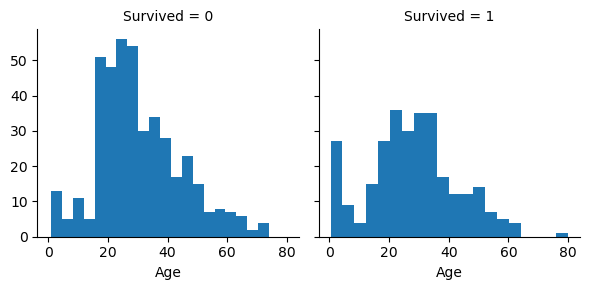

In [18]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

观测结果：

- 儿童生还率高
- 年纪最大的生还了
- 大量15-25岁的人没有生还
- 大多数乘客都是15-35岁

这种分析证实了我们的假设，指导接下来的workflow

- 要在模型中考虑年龄
- 把年龄数据补全
- 给年龄分区间 

## 查看数值类、顺序类特征

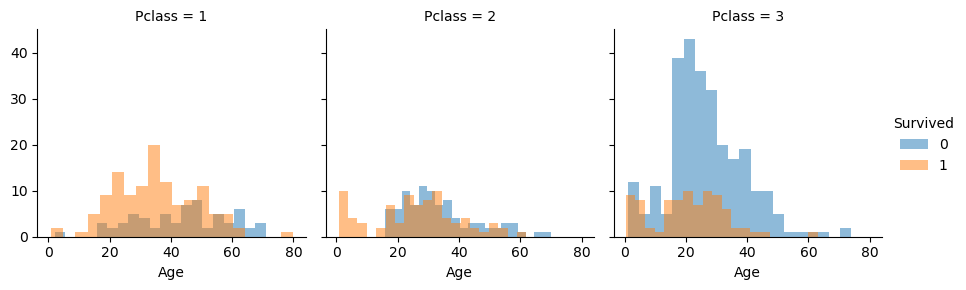

In [19]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')  
#grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

观测结果：

- Pclass=3 乘客最多，大多数都没有生还
- Pclass=2  Pclass=3 中的儿童大多都生还了
- Pclass=1 的乘客大多生还
- Pclass 根据年龄变化

决定：建模时考虑`Pclass `

## 查看类别类特征

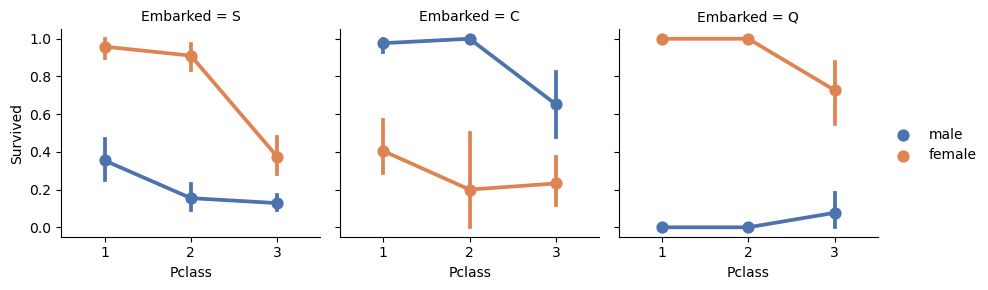

In [20]:
grid = sns.FacetGrid(train_df,col='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

观测结果：

- 女的比男的容易生还
- 在`Embarked=C `时男的生还率高，但是这是因为上船地点和Pclass有关，所以间接影响了生还率，可以不考虑
- 对于C和Q端口，雄性在Pclass=3时存活率高于Pclass=2
- 登船港口对Pclass=3和男性乘客的存活率不同

决定：
- 建模时考虑Sex
- 补全Embarked特征并加入训练模型

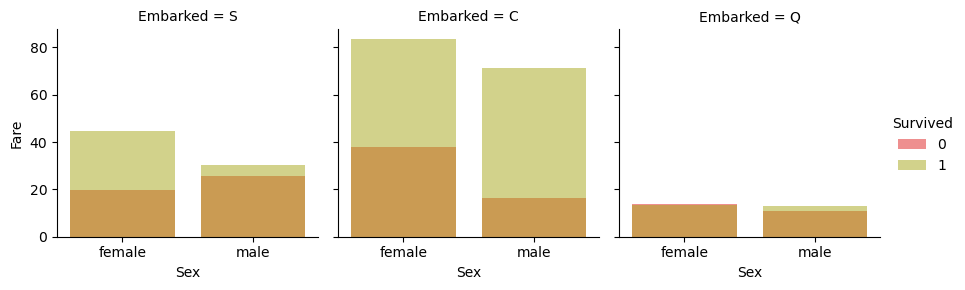

In [21]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'r', 1: 'y'})
#grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

观测结果：

- Higher fare paying passengers had better survival. 
- Port of embarkation correlates with survival rates.

## 整理数据

### 通过删除要素进行校正

根据我们的假设和决定，我们希望删除`Cabin`和`Ticket`。

请注意，在适用的情况下，我们会同时对训练数据集和测试数据集执行操作，以保持一致性。

In [22]:
print("before", train_df.shape, test_df.shape, combine[0].shape,combine[1].shape)  #combine[0]表示第一个数据框

before (891, 12) (418, 11) (891, 12) (418, 11)


In [23]:
train_df = train_df.drop(['Ticket','Cabin'],axis=1)  #axis=1表示列
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df, test_df]
print("after", train_df.shape, test_df.shape, combine[0].shape,combine[1].shape)

after (891, 10) (418, 9) (891, 10) (418, 9)


### 从现有特征提取创建新特征

We want to analyze if `Name` feature can be engineered to extract titles and test correlation between titles and survival, before dropping `Name` and `PassengerId` features.

In the following code we extract `Title` feature using *regular expressions(正则表达式)*. The *RegEx* pattern (\w+\.) matches the first word which ends with a dot character within `Name` feature(匹配`Name`中以点字符结尾的第一个单词). The `expand=False` flag returns a DataFrame.

使用正则表达式从`Name`中提取称呼词，如Mrs，Mr，Miss等

为了提取Mr,可以看到Mr前面有空格，且从大写字母开始再到小写字母 。
所以该正则表达式也是类似：先空了一格，从大写字母A-Z中匹配，再从小写字母a-z中匹配， 到 .（点）这里结束。
\表示转义，在正则表达式中点（.）表示：匹配除换行符 \n 之外的任何单字符。若要直接使用则需要加上转义符号。

In [24]:
#提取称呼词
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)  #expand=False返回数据框
# 形成title和Sex的列联表
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
# 将不常见的称呼合并为Rare，一些名称也可以合并到其它名称中
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
# 求每个称呼人群的生存率
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [26]:
# 进行编码
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)  #map函数的用法
    dataset['Title'] = dataset['Title'].fillna(0)    #填充缺失值为0
train_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在，我们可以安全地从训练和测试数据集中删除` Name `。我们也不需要训练数据集中的`PassengerID `特征。

In [27]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df, test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

### 对分类变量进行编码

现在我们可以将包含字符串的特征转换为数值。这是大多数模型算法所必需的。这样做也将帮助我们实现功能完成目标。

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 补全连续数值变量的缺失值

有三种方法：

- 通过均值和方差随机生成
- 通过其他特征Pclass,Gender来计算（更准确）。在我们的例子中，我们注意到`年龄`、`性别`和 `Pclass` 之间的相关性。使用跨 Pclass 和性别特征组合集的年龄中值猜测年龄值。因此，Pclass=1 和 Gender=0、Pclass=1 和 Gender=1 的年龄中位数，依此类推......
- 结合上边两种方法

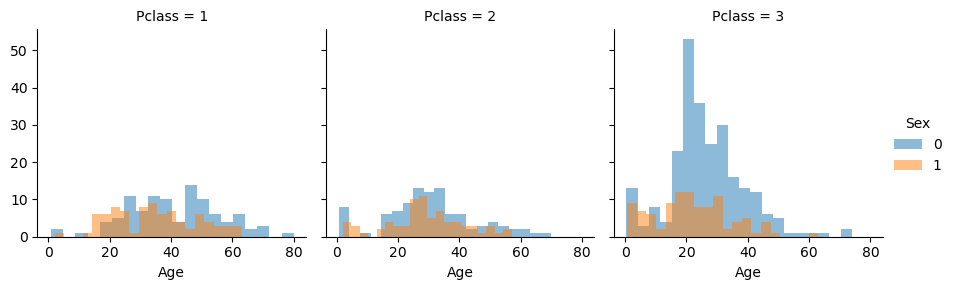

In [29]:
grid = sns.FacetGrid(train_df, col = 'Pclass',hue='Sex')
#grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed `Age` values based on `Pclass`×`Gender` combinations.下面来估计Age的值

In [30]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()#求不同级别不同性别的年龄中位数

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
            #查找不同级别不同性别且为缺失值的年龄索引，赋相应的值
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)  #将年龄划分为5个区间
#按年龄区间计算生存率
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


## 根据年龄区间编码

In [33]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [34]:
# 去掉AgeBand特征
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 根据已有变量创造新变量

We can create a new feature for `FamilySize` which combines `Parch` and `SibSp`. This will enable us to drop `Parch` and `SibSp` from our datasets.

In [35]:
## 创造FamilySize新变量
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
# 根据新变量分组计算生存率
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
## 同样可以创造IsAlone新变量(是否是独身一人)
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
# 计算是否独身一人的生存率差异
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop `Parch`, `SibSp`, and `FamilySize` features in favor of `IsAlone`.

In [37]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


同样可以根据`Pclass` and` Age`创造新变量`Age*Class`

In [38]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## 将分类变量补充并编码

`Embarked` feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

如果你想用`mode()`函数的计算结果填充DataFrame的缺失值，请使用这个方法：`df.fillna(df.mode().iloc[0])`。

In [39]:
freq_port = train_df.Embarked.dropna().mode()[0]  #取变量的众数补充缺失值
freq_port

'S'

In [40]:
# 补充缺失值
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)   
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
# 编码
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


We can now complete the `Fare` feature for single missing value in `test dataset` **using mode** to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the `fare` to two decimals as it represents currency.(将票价四舍五入到小数点后两位)

In [42]:
## 对测试集中fare的缺失值进行填充
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [43]:
#对fare进行划分
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
#根据区间进行编码
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
#删除fareband变量
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [45]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


至此，数据集的处理完成了，我们做了以下几件事情：

- 丢弃了没用的feature
- 合成了新的feature
- 所有feature都转化成数值类型

## 建立模型进行预测

现在，我们已准备好训练模型并预测所需的解决方案。有60+预测建模算法可供选择。我们必须了解问题的类型和解决方案要求，以缩小到我们可以评估的几个模型。我们的问题是`分类和回归问题`。我们希望确定`输出（幸存与否）`与其他变量或特征（性别、年龄、端口等）之间的关系。我们还在执行一类机器学习，称为`监督学习`，因为我们正在使用给定的数据集训练我们的模型。有了这两个标准——**监督学习加上分类和回归**，我们可以将模型的选择范围缩小到几个。其中包括：
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [46]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

### 逻辑回归

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

80.36

In [48]:
#得到模型方程的参数
coeff_df = pd.DataFrame(train_df.columns.delete(0))  #删除第一个特征Survived
coeff_df.columns = ['Feature']  #修改列名
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])  #coef_得到参数列表
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


- `Sex`是最高的正系数，这意味着随着性别值的增加（男性：0到女性：1），存活=1的概率增加最多。
- 与 `Pclass` 增加相反，生存 = 1 的概率降低最多。
- 通过这种方式，`Age*Class	`是一个很好的人工特征，因为它与幸存的负相关度第二高。
- `Title`作为第二高的正相关也是如此。

### 支持向量机（SVM）

In [49]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_SVC = round(svc.score(X_train,Y_train)*100,2)
acc_SVC

78.23

### k-最近邻算法（或简称k-NN）

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

### 朴素贝叶斯分类器

In [51]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### 感知机（Perceptron）

In [52]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

### LinearSVC(线性分类支持向量机)

In [53]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

### SGD(随机梯度下降)

In [54]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.78

### 决策树

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

### 随机森林

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## 模型评估

现在，我们可以对所有模型的评估进行排名，以选择最适合我们问题的模型。虽然决策树和随机森林的得分相同，但我们选择使用随机森林，因为它们纠正了决策树过度拟合其训练集的习惯。

In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_SVC, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,77.78
4,Naive Bayes,72.28


In [58]:
# 提交
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

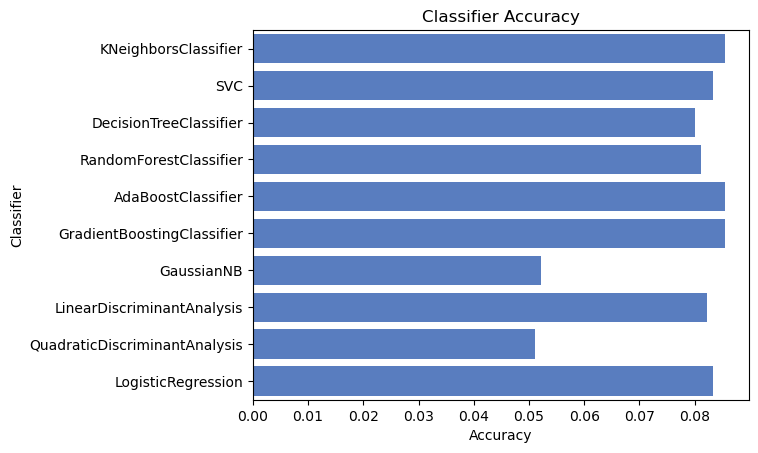

In [59]:
# 同时进行模型建立
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)#分成10组，测试比例为0.1，训练比例是0.9

X = train_df.values[0::, 1::]
y = train_df.values[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

# 集成学习Ensembling/Stacking

第二篇学习文章来自https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python

In [60]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

## 特征工程/分类变量编码

In [61]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
combine = [train, test]  #合并数据框
# Store our passenger ID for easy access
PassengerId = test['PassengerId']

### 特征工程

In [62]:
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

In [63]:
# Feature that tells whether a passenger had a cabin on the Titanic
train['has_cabin'] = train['Cabin'].apply(lambda x:0 if type(x)==float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [64]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in combine:
    dataset['familysize'] = dataset['SibSp']+dataset['Parch']+1

In [65]:
# Create new feature IsAlone from FamilySize
for dataset in combine:
    dataset['Isalone'] = 0
    dataset.loc[dataset['familysize']==1,'Isalone'] = 1

In [66]:
# Remove all NULLS in the Embarked column
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')  #用众数补充缺失值

In [67]:
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())  #用中位数补充缺失值
train['CategoricalFare'] = pd.qcut(train['Fare'],4)  #将Fare进行数据分箱，分为4组，每组数据量相同

In [68]:
# Create a New feature CategoricalAge
# 生成随机数补充缺失值
for dataset in combine:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
#对年龄进行分组
train['CategoricalAge'] = pd.cut(train['Age'],5)

In [69]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [70]:
# Create a new feature Title, containing the titles of passenger names
for dataset in combine:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [71]:
# Group all non-common titles into one single grouping "Rare"
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

### 分类变量进行编码

In [72]:
# 对分类变量进行编码
for dataset in combine:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map({'female':0,'male':1}).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

### 特征选择

In [73]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

## 数据可视化

### Pearson Correlation Heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

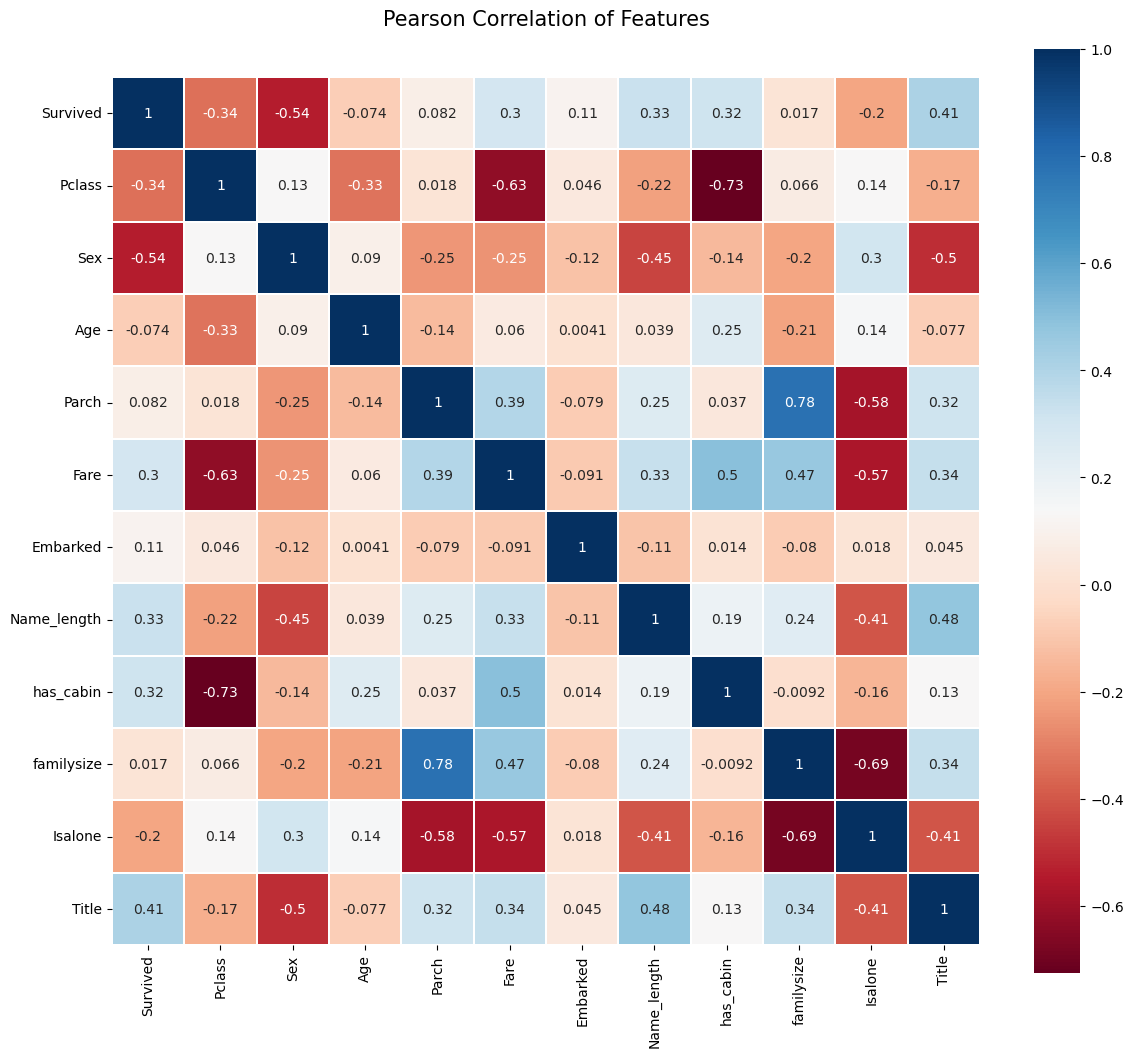

In [74]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

皮尔逊相关图可以告诉我们的一件事是，没有太多特征彼此强相关。从将这些功能输入到您的学习模型中的角度来看，这很好，因为这意味着我们的训练集中没有太多冗余或多余的数据，我们很高兴每个特征都带有一些独特的信息。

### 配对图

最后，让我们生成一些配对图来观察数据从一个特征到另一个特征的分布。我们再次使用Seaborn来帮助我们。

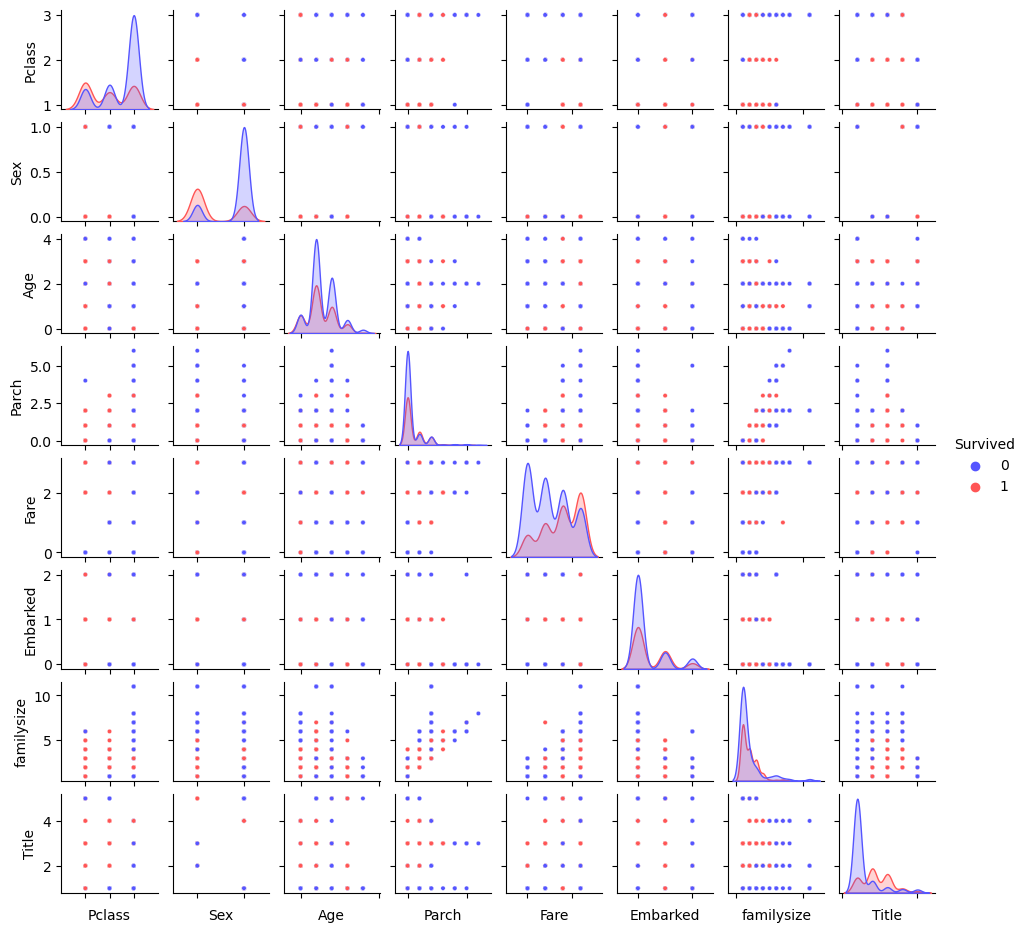

In [75]:
g = sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked','familysize', 'Title']], hue='Survived', palette='seismic', size=1.2, diag_kind='kde', diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

## 建立模型

In the section of code below, we essentially write a **class** `SklearnHelper` that allows one to extend the inbuilt methods (such as **train, predict and fit**) common to all the Sklearn classifiers. Therefore this cuts out redundancy as won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [76]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility(再现)
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold( n_splits= NFOLDS, shuffle=True, random_state=SEED)

首先有个5折的KFold，然后定义一个类，包含train,predict,fit,feature_importances的方法

在创建下面基本分类器时，将只使用 Sklearn 库中已经存在的模型，因此只为此扩展类。

- `def init` ：用于调用类的默认构造函数的 Python 标准。这意味着当你想要创建一个对象（分类器）时，你必须给它提供clf（你想要的sklearn分类器），种子（随机种子）和参数（分类器的参数）的参数。

代码的其余部分只是类的方法，它们只是调用 sklearn 分类器中已经存在的相应方法。从本质上讲，我们创建了一个包装类来扩展各种 Sklearn 分类器，这样当我们在堆栈器上实现多个学习器时，这应该有助于我们减少一遍又一遍地编写相同代码的情况。

In [77]:
# Class to extend the Sklearn classifier 定义类
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)  #分类器

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)  #训练集拟合

    def predict(self, x):
        return self.clf.predict(x)  #预测
    
    def fit(self,x,y):
        return self.clf.fit(x,y)  #测试集拟合
    
    def feature_importances(self,x,y):  #特征重要性
        print(self.clf.fit(x,y).feature_importances_)
# Class to extend XGboost classifer

### Out-of-Fold Predictions

stacking使用基础分类器的预测作为训练到二级模型的输入。然而，不能简单地在完整的训练数据上训练基础模型，在整个测试集上生成预测，然后输出这些预测用于二级训练。这会带来基本模型预测已经“看到”测试集的风险，因此在提供这些预测时会过度拟合。

In [78]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

### 生成Tier-1模型

#### 准备五个学习模型作为我们的第一级分类

这些模型都可以通过 Sklearn 库方便地调用，如下所示
- Random Forest classifier
- Extra Trees classifier
- AdaBoost classifer
- Gradient Boosting classifer
- Support Vector Machine

#### 参数

- `n_jobs`：用于训练过程的核心数。如果设置为 -1，则使用所有内核。

- `n_estimators`：学习模型中的分类树数（默认设置为 10）

- `max_depth`：树的最大深度，或节点应扩展多少。当心，如果设置为太高的数字会带来过度拟合的风险，因为一个人会把树长得太深

- `verbose` ：控制是否要在学习过程中输出任何文本。值 0 表示抑制所有文本，而值 3 表示在每次迭代时输出树学习过程。

In [79]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

此外，既然已经提到了 OOP 框架中的对象和类，现在让我们通过我们之前定义的帮助进程 Sklearn 类创建 5 个代表我们的 5 个学习模型的对象。

In [80]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

#### 从我们的训练集和测试集中创建 NumPy 数组

在准备好了我们的第一层基础模型之后，我们现在可以通过从原始数据帧生成 NumPy 数组来准备训练和测试数据以输入到我们的分类器中，如下所示：

In [81]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

#### Tier-1模型的输出

将训练和测试数据馈送到 5 个基础分类器中，并使用我们之前定义的 Out-of-Fold 预测函数来生成第一级预测。等待几分钟，让下面的代码块运行。

In [82]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


#### Feature importances generated from the different classifiers

现在学习了我们的一级分类器，我们可以利用 Sklearn 模型的一个非常漂亮的功能，那就是用一行非常简单的代码输出训练和测试集中各种特征的重要性。

根据 Sklearn 文档，大多数分类器都内置了一个属性，该属性只需键入 `.featureimportance `即可返回特征重要性。

In [83]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[0.10355791 0.20819879 0.03502027 0.02083921 0.04776042 0.02984629
 0.13084101 0.04847055 0.07057479 0.012071   0.29281975]
[0.12138604 0.37713692 0.03029646 0.01648997 0.05649613 0.02875213
 0.04639542 0.08366228 0.04330023 0.0223064  0.17377802]
[0.028 0.008 0.014 0.074 0.036 0.01  0.7   0.01  0.048 0.004 0.068]
[0.08634804 0.01391941 0.04477732 0.01388825 0.0535793  0.02594401
 0.17631693 0.03585326 0.11385017 0.00690326 0.42862006]


I have not yet figured out how to assign and store the feature importances outright. Therefore I'll print out the values from the code above and then simply copy and paste into Python lists as below 

In [84]:
rf_features = [0.10474135,  0.21837029,  0.04432652,  0.02249159,  0.05432591,  0.02854371
  ,0.07570305,  0.01088129 , 0.24247496,  0.13685733 , 0.06128402]
et_features = [ 0.12165657,  0.37098307  ,0.03129623 , 0.01591611 , 0.05525811 , 0.028157
  ,0.04589793 , 0.02030357 , 0.17289562 , 0.04853517,  0.08910063]
ada_features = [0.028 ,   0.008  ,      0.012   ,     0.05866667,   0.032 ,       0.008
  ,0.04666667 ,  0.     ,      0.05733333,   0.73866667,   0.01066667]
gb_features = [ 0.06796144 , 0.03889349 , 0.07237845 , 0.02628645 , 0.11194395,  0.04778854
  ,0.05965792 , 0.02774745,  0.07462718,  0.4593142 ,  0.01340093]

从包含特征重要性数据的列表创建数据框，以便通过 Plotly 包轻松绘制。

In [85]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

#### 交叉特征（散点图）Interactive feature importances via Plotly scatterplots

使用交互式 Plotly 包，通过绘图散点图可视化不同分类器的特征重要性值，方法是调用“散点”

In [86]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

计算所有特征重要性的平均值，并将其存储为特征重要性数据框中的新列。

In [87]:
# Create the new column containing the average of values
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,Pclass,0.104741,0.121657,0.028,0.067961,0.080590
1,Sex,0.218370,0.370983,0.008,0.038893,0.159062
2,Age,0.044327,0.031296,0.012,0.072378,0.040000


#### 平均特征重要性的条形图

获得所有分类器的平均特征重要性后，我们可以将它们绘制成 Plotly 条形图

In [88]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

### 来自Tier-1输出的Tier-2预测

#### Tier-1的输出作为新特征

现在获得了我们的第一级预测，可以将其视为构建一组新的特征，用作下一个分类器的训练数据。因此，根据下面的代码，我们将早期分类器的第一级预测作为新列，并在此基础上训练下一个分类器。

In [89]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0


#### 生成Tier-2的相关分析热力图

In [90]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [91]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

Having now concatenated and joined both the first-level train and test predictions as `x_train` and `x_test`, we can now fit a second-level learning model.

#### Tier-2学习模型（XGBoost）

在这里，我们选择了非常著名的提升树学习模型库XGBoost。它旨在优化大规模提升树算法。我们调用 XGBClassifier 并将其拟合到第一级训练和目标数据，并使用学习的模型来预测测试数据

XGBoost 参数：

- `max_depth`：树长深度。请注意，如果设置太高的数字可能会有过度拟合的风险。

- `Gamma` ：在树的叶节点上进行进一步分区所需的最小损失减少。算法越大，越保守。

- `ETA`：每个提升步骤中使用的步长收缩，以防止过度拟合

In [92]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

#### 生成提交文档

最后，在训练并拟合了我们所有的一级和第二级模型之后，我们现在可以将预测输出为适当的格式，以便提交到泰坦尼克号竞赛中

In [93]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

可以采取一些额外步骤来提高一个人的分数：

1. 在训练模型时实施良好的交叉验证策略以找到最佳参数值
2. 引入更多种类的学习基础模型。 结果越不相关，最终得分越高。

# 进阶特征工程

In [94]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [95]:
#定义连接函数
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data,test_data], sort=True).reset_index(drop=True)

In [96]:
# 定义分割函数
def divide_df(all_data):
        # Returns divided dfs of training and test set\
        return all_data.loc[:890],all_data[891:].drop(['Survived'],axis=1)

In [97]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
all = concat_df(train, test)

In [98]:
train.name = 'Training Set'
test.name = 'Test Set'
all.name = 'All Set'

In [99]:
dfs = [train, test]

In [100]:
# 了解变量信息
print('Number of Training Examples = {}'.format(train.shape[0]))
print('Number of Test Examples = {}\n'.format(test.shape[0]))
print('Training X Shape = {}'.format(train.shape))
print('Training y shape = {}\n'.format(train['Survived'].shape[0]))
print('Test X Shape = {}'.format(test.shape))
print('Test y shape = {}\n'.format(test.shape[0]))
print(train.columns)
print(test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y shape = 891

Test X Shape = (418, 11)
Test y shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 探索性数据分析（EDA）

### 概述
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.100,NaN,S
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.525,C62 C64,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.000,C23 C25 C27,S


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [104]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,986,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C
261,1153,3,"Nilsson, Mr. August Ferdinand",male,21.0,0,0,350410,7.8542,NaN,S
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,28034,10.5000,NaN,S


### 缺失值

As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column in both training and test set.
* Training set have missing values in `Age`, `Cabin` and `Embarked` columns
* Test set have missing values in `Age`, `Cabin` and `Fare` columns

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in `Age`, `Embarked` and `Fare` are smaller compared to total sample, but roughly **80%** of the `Cabin` is missing. Missing values in `Age`, `Embarked` and `Fare` can be filled with descriptive statistical measures but that wouldn't work for `Cabin`.

In [105]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values:{}'.format(col, df[col].isnull().sum()))
    print('\n')

In [106]:
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values:0
Survived column missing values:0
Pclass column missing values:0
Name column missing values:0
Sex column missing values:0
Age column missing values:177
SibSp column missing values:0
Parch column missing values:0
Ticket column missing values:0
Fare column missing values:0
Cabin column missing values:687
Embarked column missing values:2


Test Set
PassengerId column missing values:0
Pclass column missing values:0
Name column missing values:0
Sex column missing values:0
Age column missing values:86
SibSp column missing values:0
Parch column missing values:0
Ticket column missing values:0
Fare column missing values:1
Cabin column missing values:327
Embarked column missing values:0




#### 补充Age的缺失值

`Age`中的缺失值用年龄中位数填充，但使用整个数据集的年龄中位数不是一个好的选择。`Pclass`组的中位年龄是最佳选择，因为它与`Age`**（0.408106）**和`Survived` **（0.338481）**高度相关。按乘客等级而不是其他特征对年龄进行分组也更合乎逻辑。

In [107]:
df_all_corr = all.corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()
df_all_corr.rename(columns={"level_0":"Feature 1", "level_1": "Feature 2","0":'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1']=='Age']

,Feature 1,Feature 2,0
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


为了更准确，`Sex` 被用作“分组依据”的第二级，同时填充缺失的`Age`值。从下面可以看出，`Pclass`和`Sex`组具有不同的`Age` 中值。当 `Pclass`增加时，男性和女性的中位年龄也会增加。然而，女性的“年龄”中位数往往略低于男性。下面的年龄中位数用于填充`Age` 中的缺失值。

In [108]:
age_by_pclass_sex = all.groupby(['Sex','Pclass']).median()['Age']
age_by_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [109]:
for pclass in range(1,4):
    for sex in ['female','male']:
        print('Median age of Pclass {} {}s:{}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

Median age of Pclass 1 females:36.0
Median age of Pclass 1 males:42.0
Median age of Pclass 2 females:28.0
Median age of Pclass 2 males:29.5
Median age of Pclass 3 females:22.0
Median age of Pclass 3 males:25.0


In [110]:
print('Median age of all passengers: {}'.format(all['Age'].median()))

Median age of all passengers: 28.0


In [111]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
all['Age'] = all.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

#### 补充Embarked的缺失值

`Embarked` 是一个分类特征，整个数据集中只有**2**个缺失值。这两名乘客都是女性，上层阶级，他们的票号相同。这意味着他们彼此认识并一起从同一个港口登船。上层女性乘客的`Embarked` 值是**C（瑟堡）**，但这并不一定意味着她们从该港口登船。

In [112]:
all[all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


通过Google这两个人，可以知道乔治·纳尔逊夫人（玛莎·伊芙琳饰）和她的女仆艾米莉·伊卡德一起从S（南安普敦）出发，因此缺失值填充为S。

In [113]:
# Filling the missing values in Embarked with S
all['Embarked'] = all['Embarked'].fillna('S')

#### 补充Fare的缺失值

只有一名乘客缺少`Fare` 值。我们可以假设`Fare` 与家庭规模（`Parch`和`SibSp`）和`Pclass`特征有关。持有三等舱机票且没有家庭的男性的`Fare` 中位数是填补缺失值的合理选择。

In [114]:
all[all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [115]:
med_fare = all.groupby(['Pclass','Parch','SibSp']).Fare.median()
med_fare[3][0][0]  #筛选第三等级，且没有家庭成员的fare中位数

7.8542

In [116]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
all['Fare'] = all['Fare'].fillna(med_fare[3][0][0])

#### 补充Cabin的缺失值

`Cabin` 功能有点棘手，需要进一步探索。`Cabin` 值大部分缺失，该变量本身不能完全忽略，因为某些机舱的存活率可能更高。事实证明，`Cabin` 值的第一个字母是客舱所在的甲板。这些甲板主要分为乘客舱，但其中一些被多个乘客舱使用。

![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)

* 在船甲板上有 **6** 个房间标记为 **T、U、W、X、Y、Z**，但数据集中只有 **T** 舱室
* **A**、**B** 和 **C** 甲板仅供一等舱乘客使用
* **D** 和 **E** 套牌适用于所有职业
* **F** 和 **G** 甲板适用于 2 等舱和 3 等舱乘客
* 从**A**到**G**，到楼梯的距离增加，这可能是生存的一个因素

In [117]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
all['Deck'] = all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [118]:
all_decks = all.groupby(['Deck','Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
all_decks  #按deck和pclass进行计数，筛选name变量，重命名后进行转置

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [119]:
def get_pclass_dist(df):
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}
    
    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum())*100 for count in df_decks[col]]
        
    return deck_counts,deck_percentages

In [120]:
def display_pclass_dist(percentages):
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20,10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

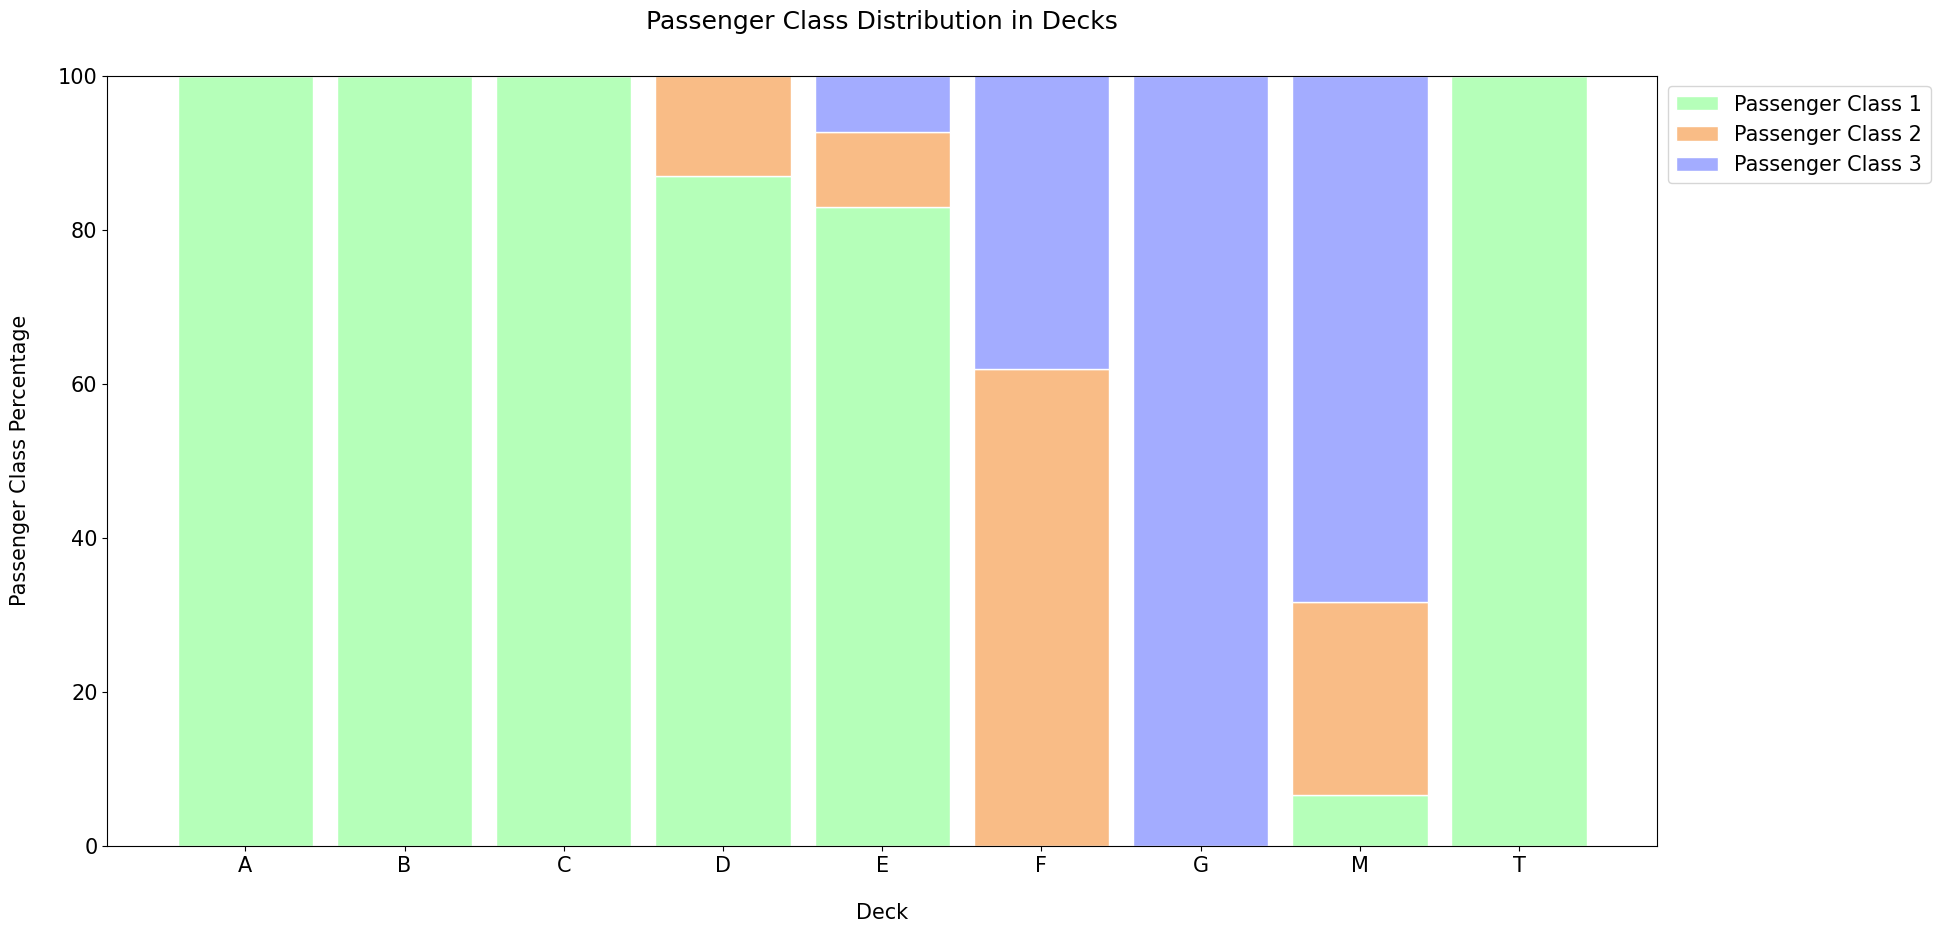

In [121]:
all_deck_count, all_deck_per = get_pclass_dist(all_decks)
display_pclass_dist(all_deck_per)

* **100%** 的A,B,C为一等乘客
* 甲板**D**有**87%**一等舱乘客和**13%**二等舱乘客
* 甲板**E**有**83%**一等舱，**10%**二等舱和**7%**三等舱乘客
* 甲板**F**有**62%**二等舱乘客和**38%**三等舱乘客
* **100%** 的 **G** 甲板是 3 等舱乘客
* 在**T**客舱的船甲板上有一个人，他是一等舱乘客。**T**客舱乘客与**A**甲板乘客最相似，因此他与**A**甲板归为一类
* 标有 **M** 的乘客是 `Cabin` 中的缺失值。我认为不可能找到这些乘客真正的“甲板”，所以我决定像甲板一样使用**M**

In [122]:
# Passenger in the T deck is changed to A将T转换为A
idx = all[all['Deck'] == 'T'].index
all.loc[idx, 'Deck'] = 'A'

In [123]:
df_all_decks_survived = all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

In [124]:
def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

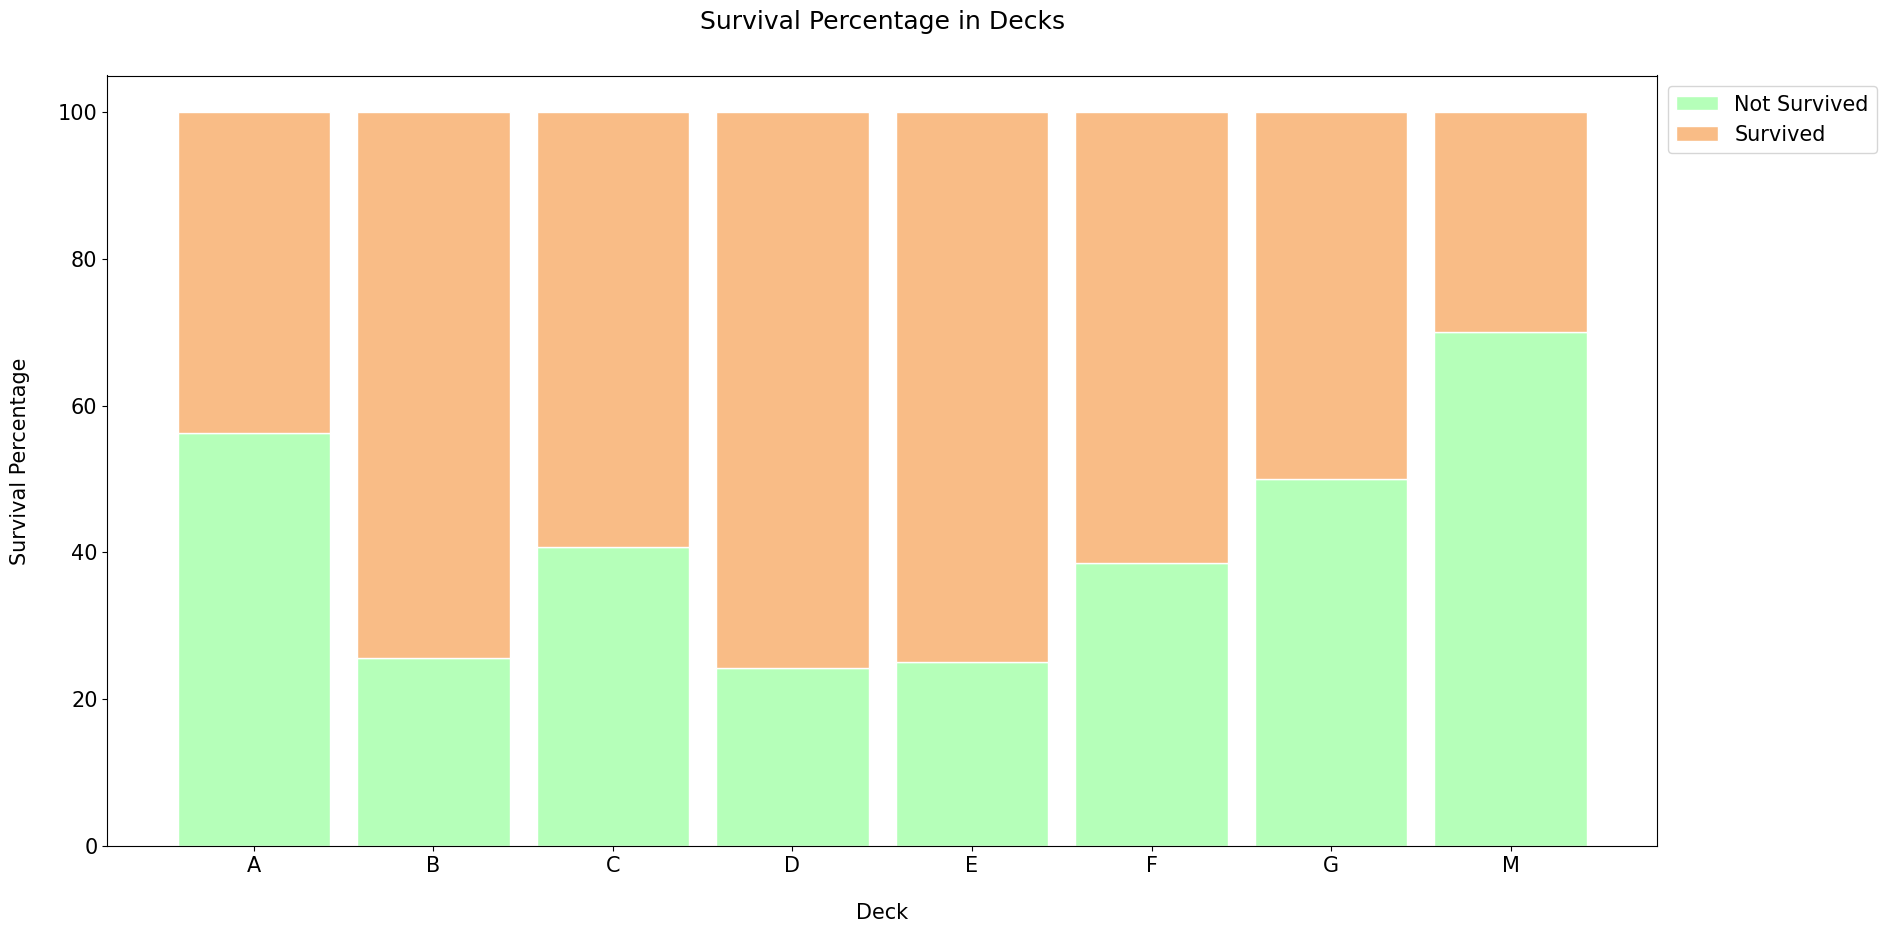

In [125]:
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

每个甲板有不同的生存率，甲板 **B**、**C**、**D** 和 **E** 的存活率最高。这些甲板主要由一等舱乘客占据。 **M** 存活率最低，主要是二等舱和三等舱乘客。总之，一等舱乘客使用的舱室比二等舱和三等舱乘客使用的舱室具有更高的生存率。在我看来，**M**（Missing `Cabin` values）的存活率最低，因为他们无法检索受害者的客舱数据。这就是为什么我认为将该组标记为 **M** 是处理缺失数据的合理方法。这是一个具有共同特征的独特群体。 `Deck` 特征现在具有高基数，因此一些值根据它们的相似性相互分组。
* **A**、**B** 和 **C** 甲板被标记为 **ABC** 因为它们都只有一等舱乘客
* **D** 和 **E** 甲板被标记为 **DE** 因为它们具有相似的乘客等级分布和相同的生存率
* **F** 和 **G** 甲板被标记为 **FG** 出于与上述相同的原因
* **M** 卡组不需要和其他卡组分组，因为它与其他卡组非常不同，而且存活率最低。

In [126]:
all['Deck'] = all['Deck'].replace(['A','B','C'],'ABC')
all['Deck'] = all['Deck'].replace(['D','E'],'DE')
all['Deck'] = all['Deck'].replace(['F','G'],'FG')

all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

After filling the missing values in `Age`, `Embarked`, `Fare` and `Deck` features, there is no missing value left in both training and test set. `Cabin` is dropped because `Deck` feature is used instead of it.

In [127]:
# 删除Cabin变量
all.drop(['Cabin'],inplace=True, axis=1)

In [128]:
#用divide_df函数将all划分为train和test
train,test = divide_df(all)

In [129]:
dfs = [train, test]

In [130]:
for df in dfs:
    display_missing(df)

Age column missing values:0
Embarked column missing values:0
Fare column missing values:0
Name column missing values:0
Parch column missing values:0
PassengerId column missing values:0
Pclass column missing values:0
Sex column missing values:0
SibSp column missing values:0
Survived column missing values:0
Ticket column missing values:0
Deck column missing values:0


Age column missing values:0
Embarked column missing values:0
Fare column missing values:0
Name column missing values:0
Parch column missing values:0
PassengerId column missing values:0
Pclass column missing values:0
Sex column missing values:0
SibSp column missing values:0
Ticket column missing values:0
Deck column missing values:0




至此缺失值的补充工作完成！

### 因变量分布

* **38.38%** （342/891） 的训练集是 **类 1**
* **61.62%** （549/891） 的训练集是 **类 0**

In [131]:
#计算生存与未存活人数
survived = train['Survived'].value_counts()[1]   #[1]表示取第二个值，即类1的数量
not_survived = train['Survived'].value_counts()[0]

In [132]:
#计算生存率
survived_per = survived / train.shape[0]*100  #shape[0]表示观测数
not_survived_per  = not_survived / train.shape[0]*100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, train.shape[0], not_survived_per))

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


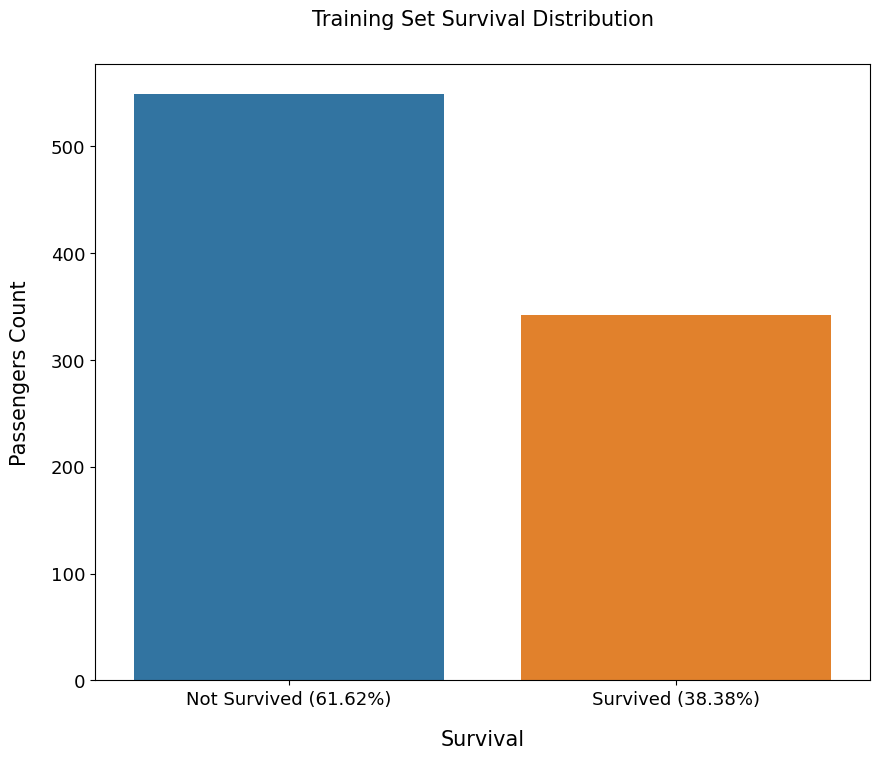

In [133]:
plt.figure(figsize=(10,8))
sns.countplot(train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passengers Count', size=15, labelpad=15)
plt.xticks((0,1),['Not Survived ({0:.2f}%)'.format(not_survived_per),'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title('Training Set Survival Distribution', size=15, y=1.05)
plt.show()

## 相关系数

Features are highly correlated with each other and dependent to each other. The highest correlation between features is **0.549500** in training set and **0.577147** in test set (between `Fare` and `Pclass`). The other features are also highly correlated. There are **9** correlations in training set and **6** correlations in test set that are higher than **0.1**.

In [134]:
train_corr = train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
train_corr.drop(train_corr.iloc[1::2].index,inplace=True)
train_corr_nd = train_corr.drop(train_corr[train_corr['Correlation Coefficient']== 1.0].index)

In [135]:
test_corr = test.corr().abs().unstack().sort_values(kind='quicksort', ascending = False).reset_index()
test_corr.rename(columns = {"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
test_corr.drop(test_corr.iloc[1::2].index, inplace=True)
test_corr_nd = test_corr.drop(test_corr[test_corr['Correlation Coefficient']==1.0].index)

In [136]:
# Training set high correlations
corr = train_corr_nd['Correlation Coefficient'] > 0.1
train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Age,Pclass,0.417667
10,Parch,SibSp,0.414838
12,Pclass,Survived,0.338481
14,Fare,Survived,0.257307
16,Age,SibSp,0.249747
18,Parch,Fare,0.216225
20,Parch,Age,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [137]:
# Test set high correlations
corr = test_corr_nd['Correlation Coefficient'] > 0.1
test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577489
8,Age,Pclass,0.526789
10,Age,Fare,0.345347
12,SibSp,Parch,0.306895
14,Parch,Fare,0.230410
16,Fare,SibSp,0.172032


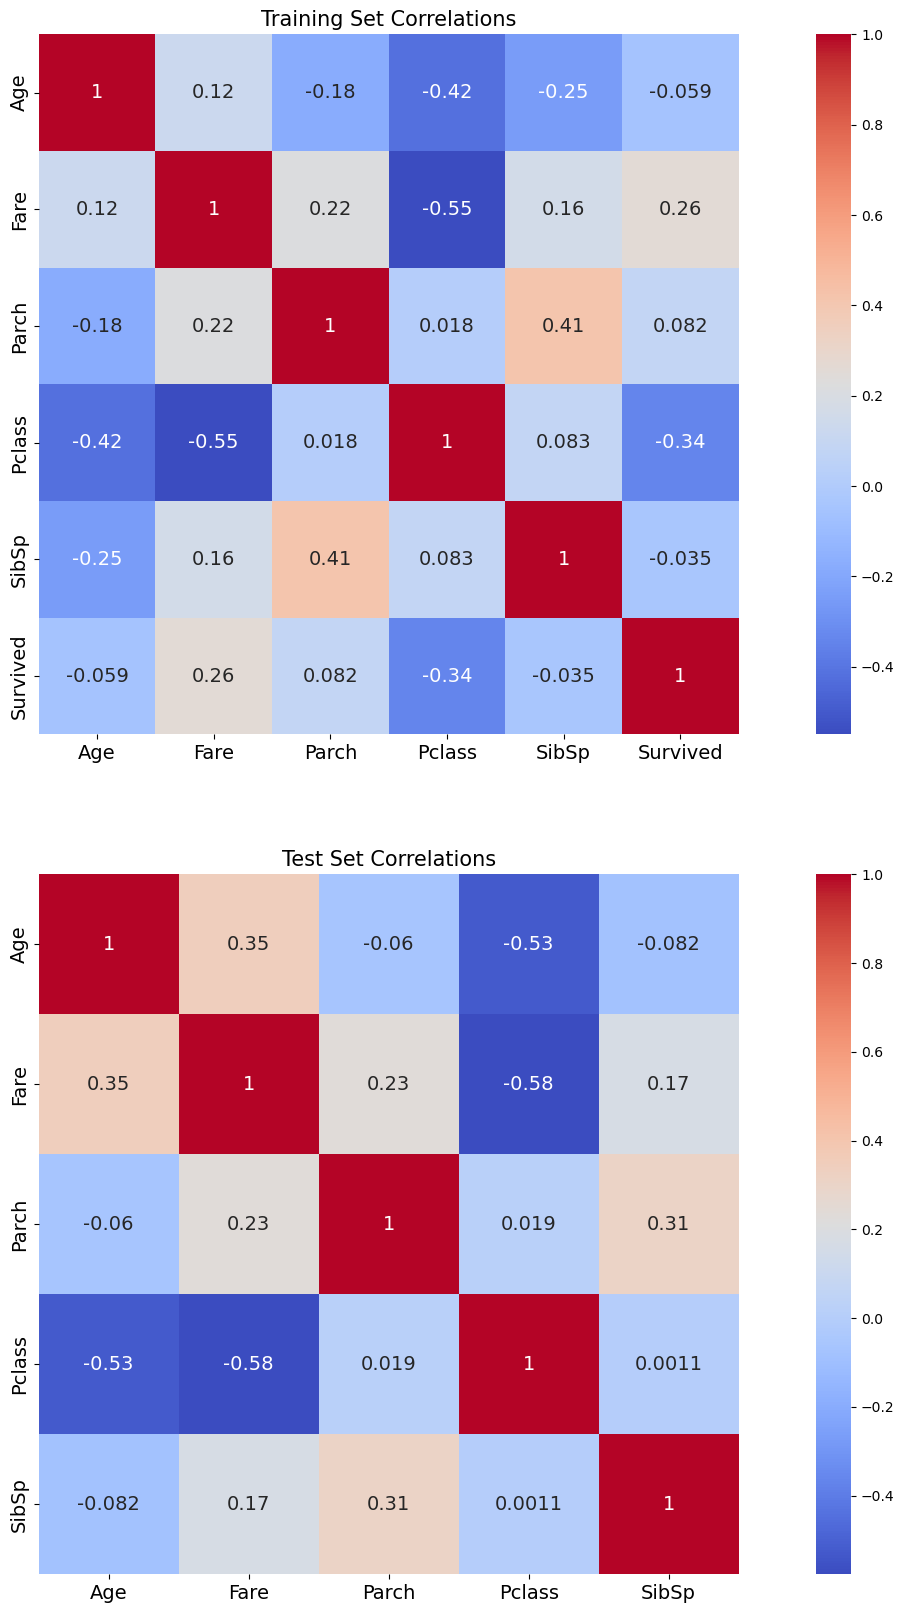

In [138]:
#绘制相关系数热力图
fig,axs = plt.subplots(nrows=2, figsize=(20,20))

sns.heatmap(train.drop(['PassengerId'],axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size':14})
sns.heatmap(test.drop(['PassengerId'],axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size':14})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

axs[0].set_title('Training Set Correlations',size=15)
axs[1].set_title('Test Set Correlations',size=15)

plt.show()

## 特征中的因变量分布

### 连续变量

In [139]:
cont_features = ['Age', 'Fare']
surv = train['Survived'] == 1

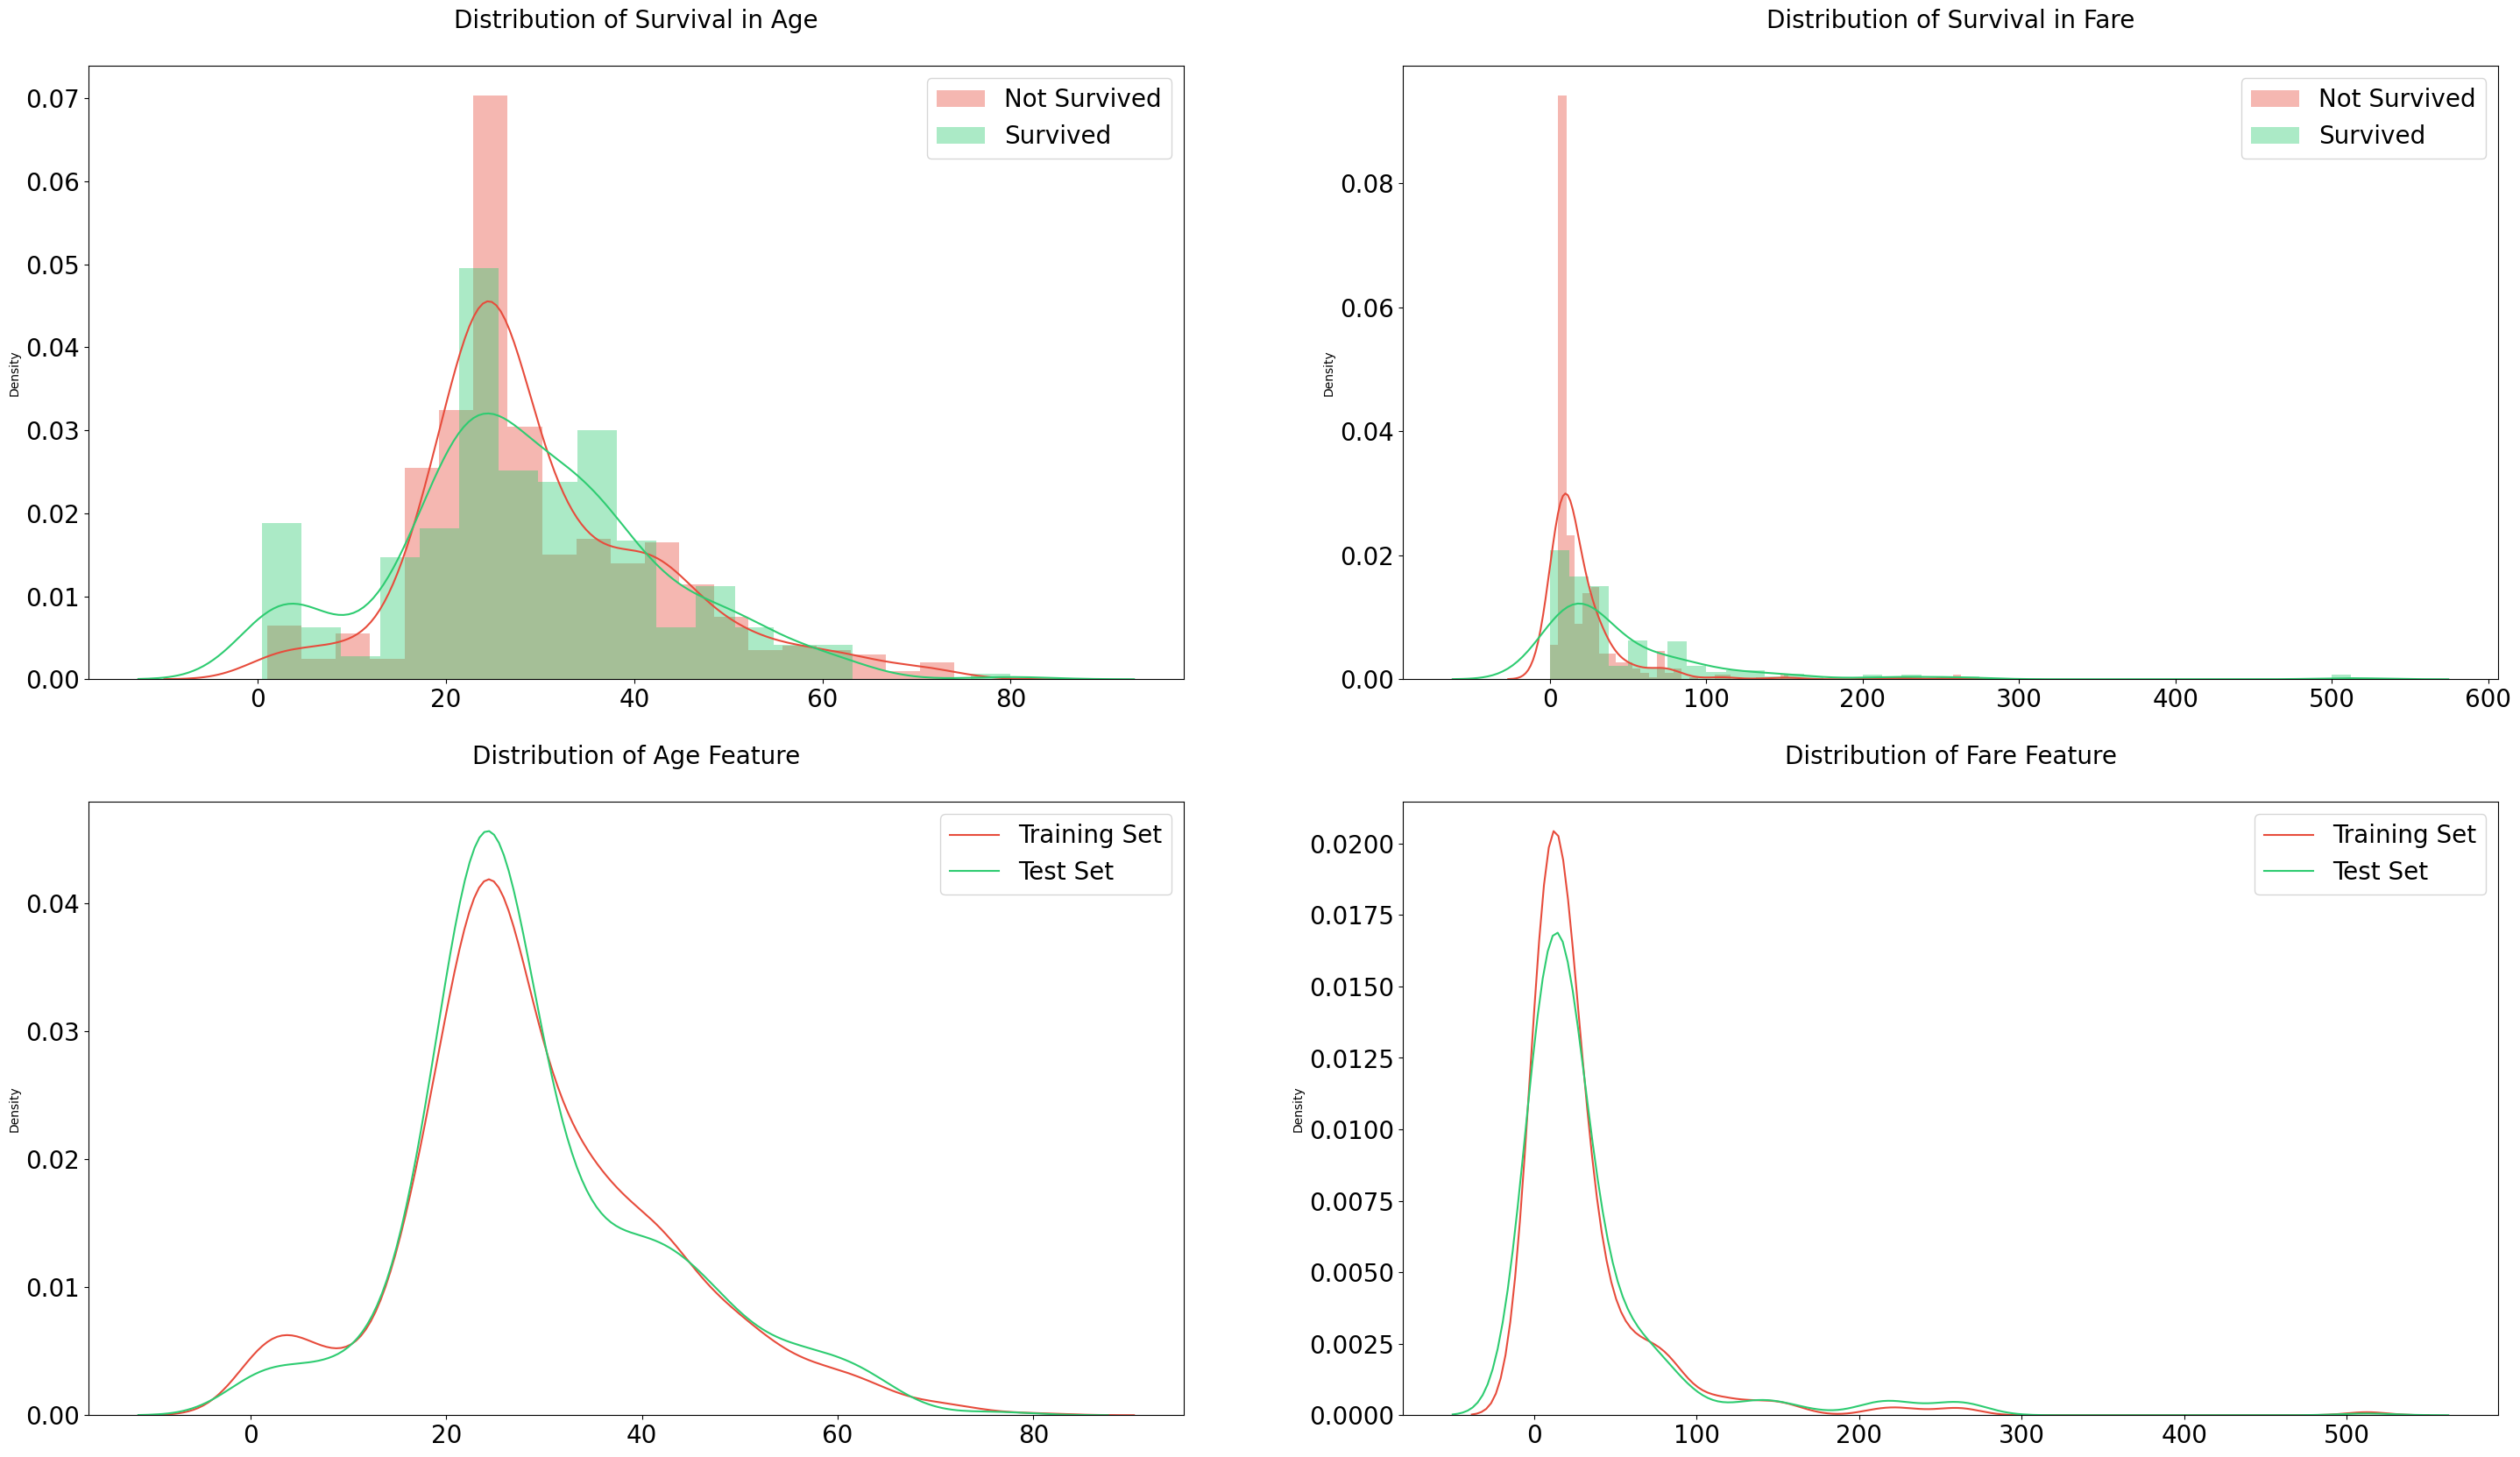

In [140]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature 
    sns.distplot(train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])#~surv表示没有没有生存=0的
    sns.distplot(train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(test[feature], label='Test Set',hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('') #x轴没有文字
    axs[1][i].set_xlabel('')
    
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y',labelsize=20)
        
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)
    
axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

两个连续特征（`Age` 和`Fare`）都有很好的分割点和尖峰，供决策树学习。这两个特征的一个潜在问题是，分布在训练集中有更多的尖峰和颠簸，但在测试集中更平滑。由于这个原因，模型可能无法泛化到测试集。

* “`Age` 特征的分布清楚地表明，15岁以下的儿童比其他任何年龄组都有更高的存活率
* 在`Fare`特征的分布中，分布尾部的存活率更高。分布还具有正偏斜，因为异常值非常大

### 分类变量

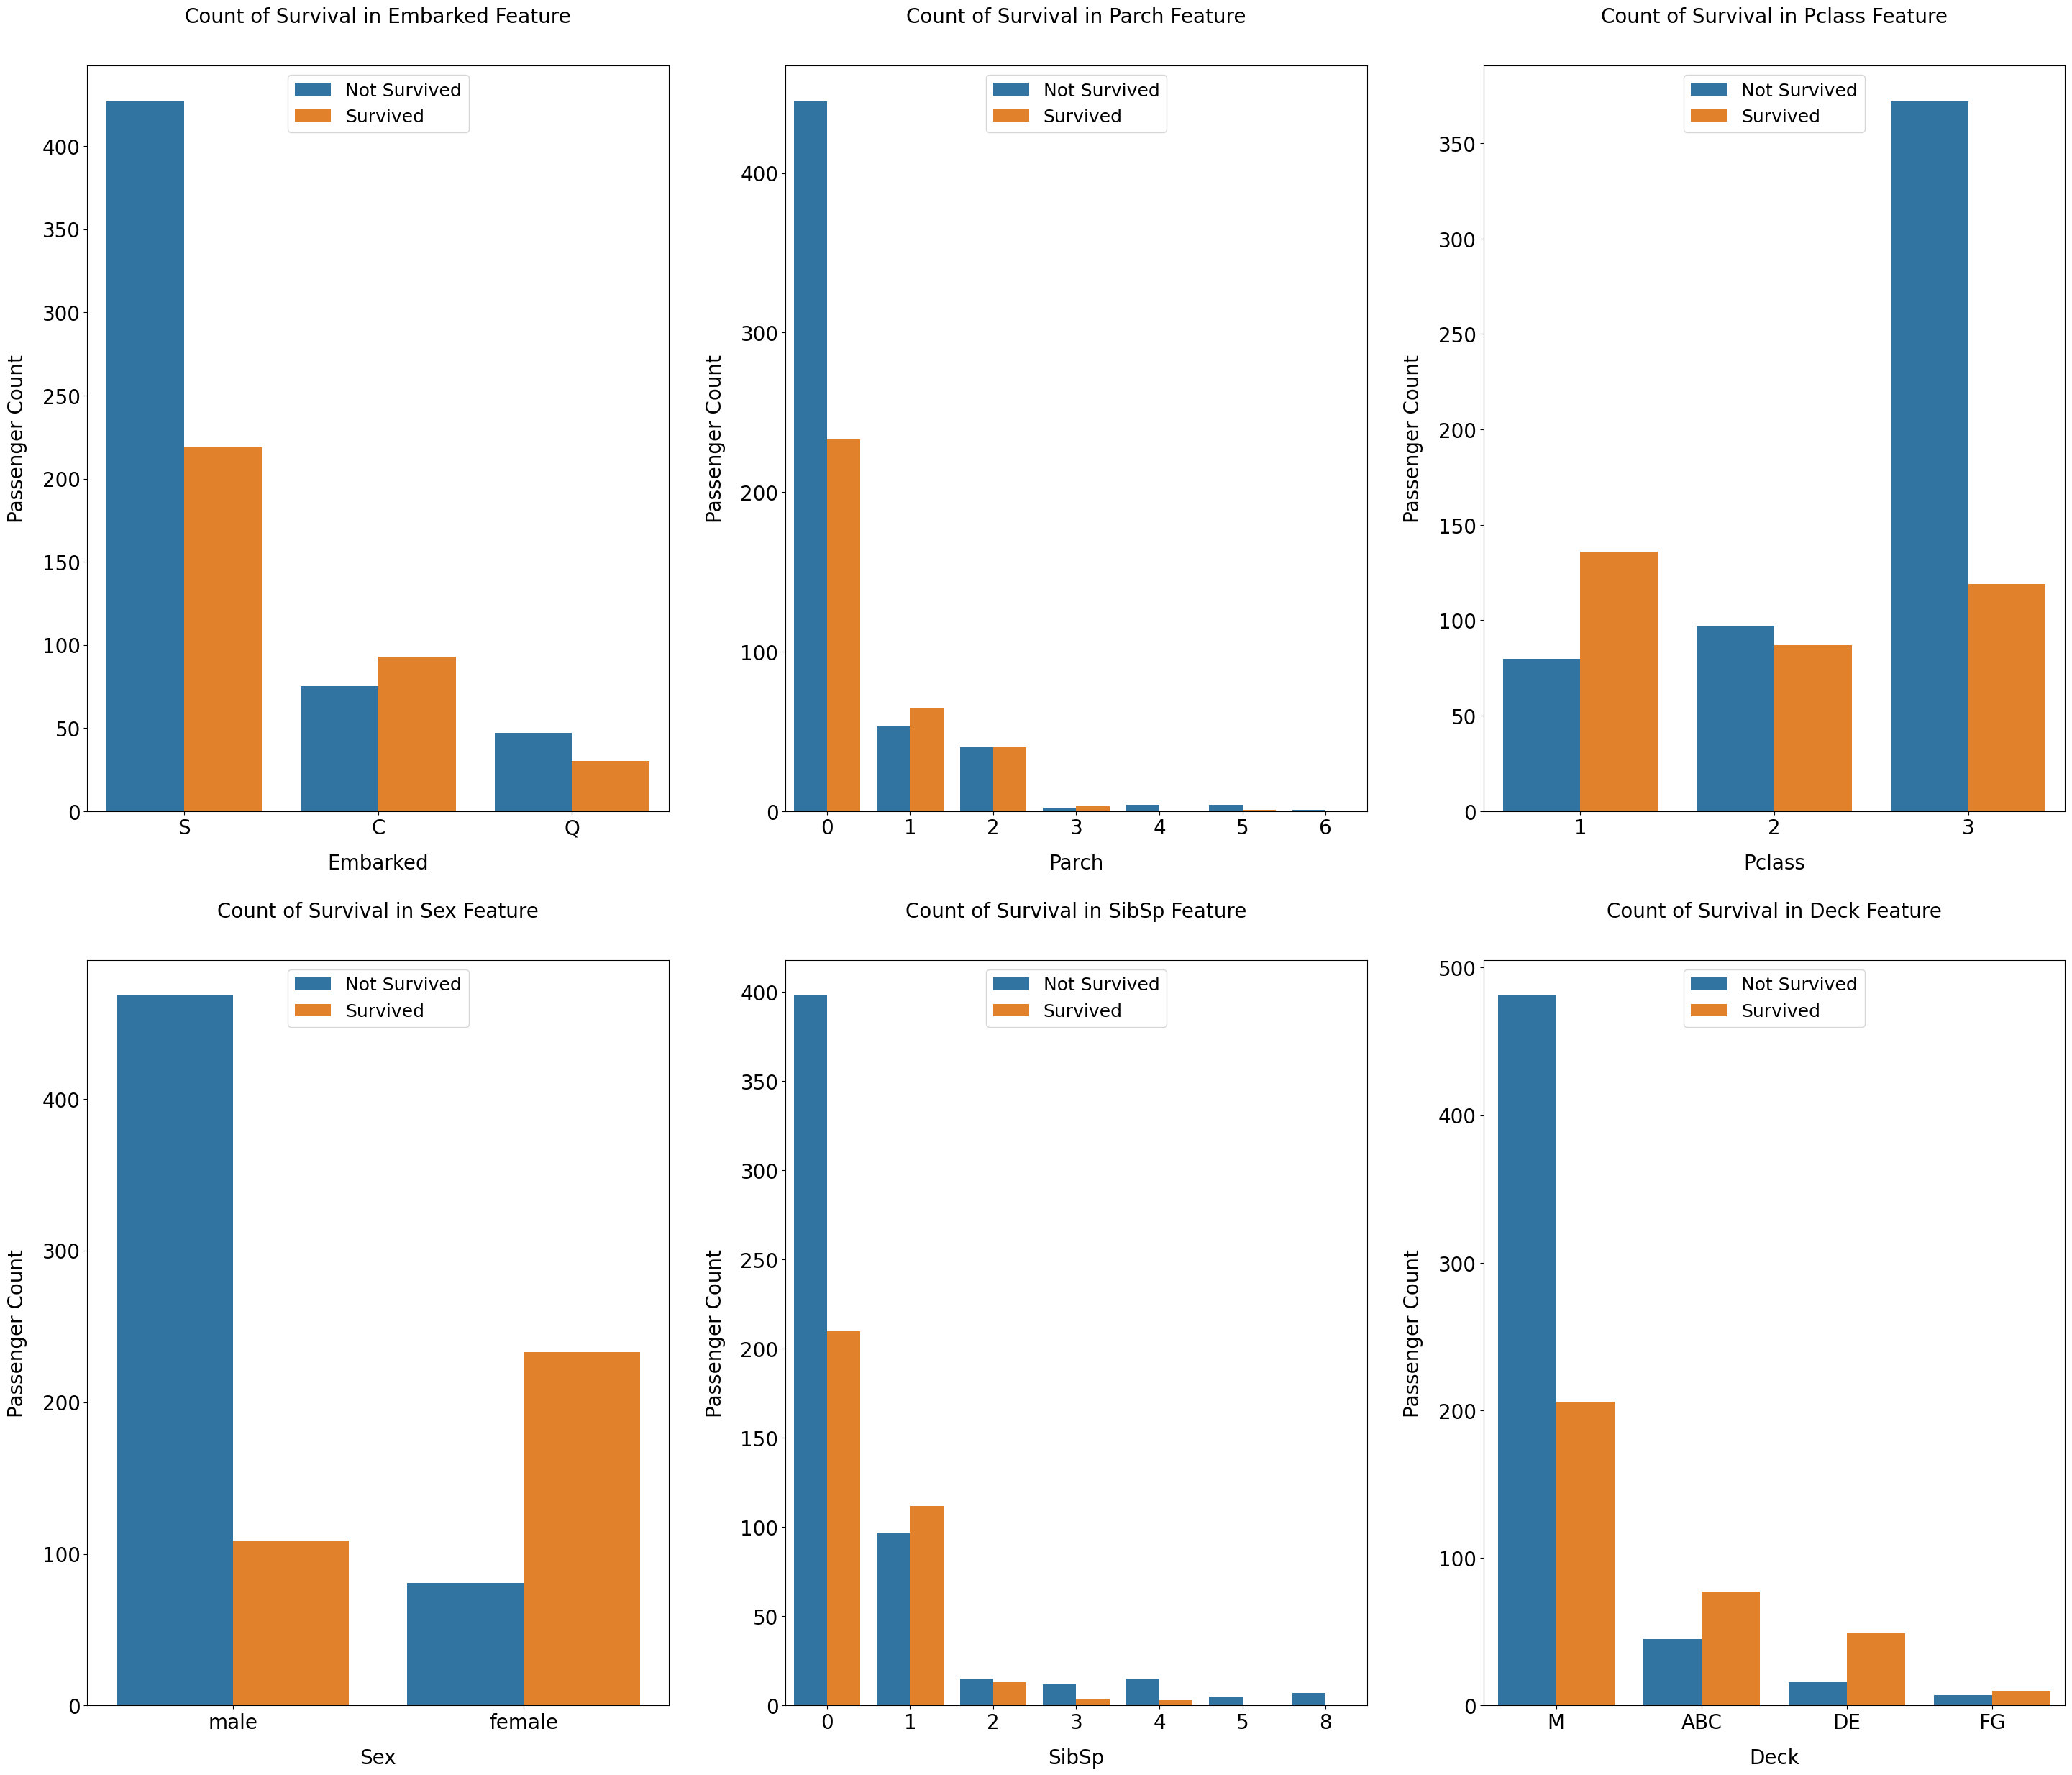

In [141]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    #1表示start=1,i从1开始
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='both', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

每个分类特征至少有一个高死亡率的类。这些类对于预测乘客是幸存者还是受害者非常有帮助。最好的分类特征是`Pclass` and `Sex`，因为它们具有最均匀的分布。

* 与其他港口不同，从**S**登机的乘客存活率较低。从C登机的乘客中有一半以上幸存下来。这一观察结果可能与`Pclass`特征有关
* `Parch`和`SibSp`特征显示，只有一个家庭成员的乘客存活率更高

### 结论

大多数特征都是相互关联的。此关系可用于通过**特征变换和特征交互**（feature transformation and feature interaction）创建新特征。目标编码也可能非常有用，因为与`Survived`高度相关。
分割点和尖峰在连续要素中可见。使用决策树模型可以轻松捕获它们，但线性模型可能无法发现它们。
分类特征具有非常不同的分布，具有不同的存活率。这些功能可以进行one-hot encoded。其中一些特征可以相互组合以创建新特征。
创建了一个名为 `Deck` 的新特征，并在**探索性数据分析**部分删除了 `Cabin` 。

In [142]:
all = concat_df(train, test)
all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## 特征工程

### 对连续变量进行分箱

#### Fare

`Fare` 特征是正偏斜的，右端的存活率非常高。基于分位数分为13个箱用于`Fare` 。即使分箱太多，它们也提供了相当多的信息增益。图表左侧的组存活率最低，图表右侧的组存活率最高。这种高存活率在分布图中不可见。在这个过程中，还有一个不寻常的组**（15.742，23.25]** ，存活率很高。

In [143]:
all['Fare'] = pd.qcut(all['Fare'],13)  #将fare分为13份，每份数量相同

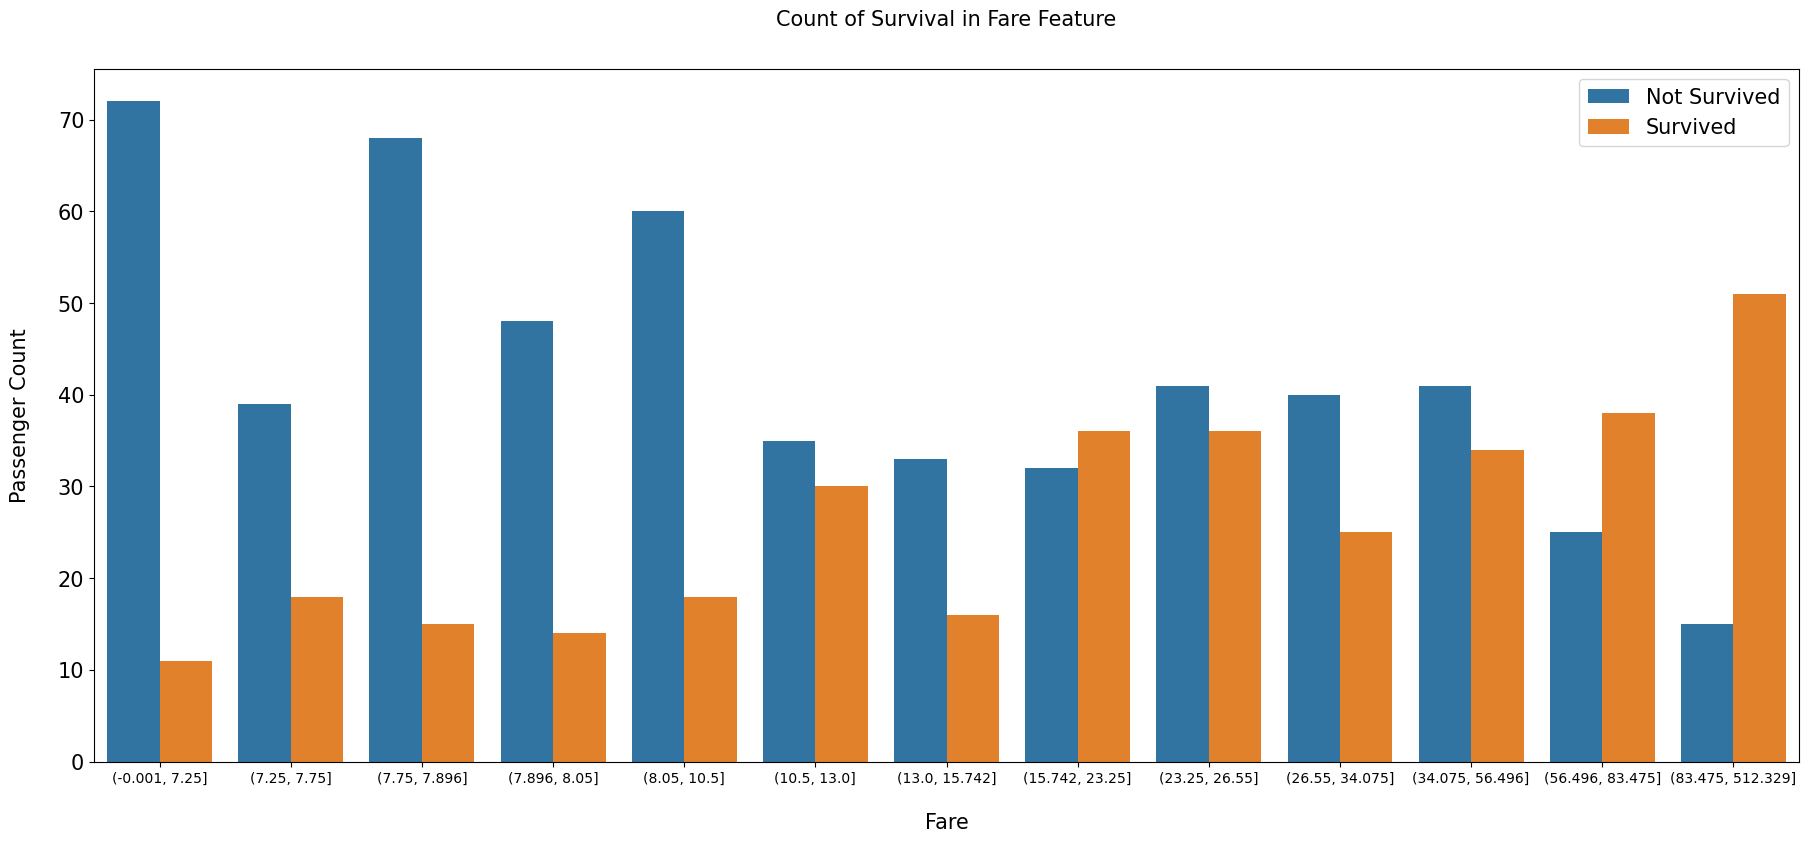

In [144]:
fig,axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Fare', hue='Survived', data=all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived','Survived'],loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

#### Age

In [145]:
all['Age'] = pd.qcut(all['Age'],10)

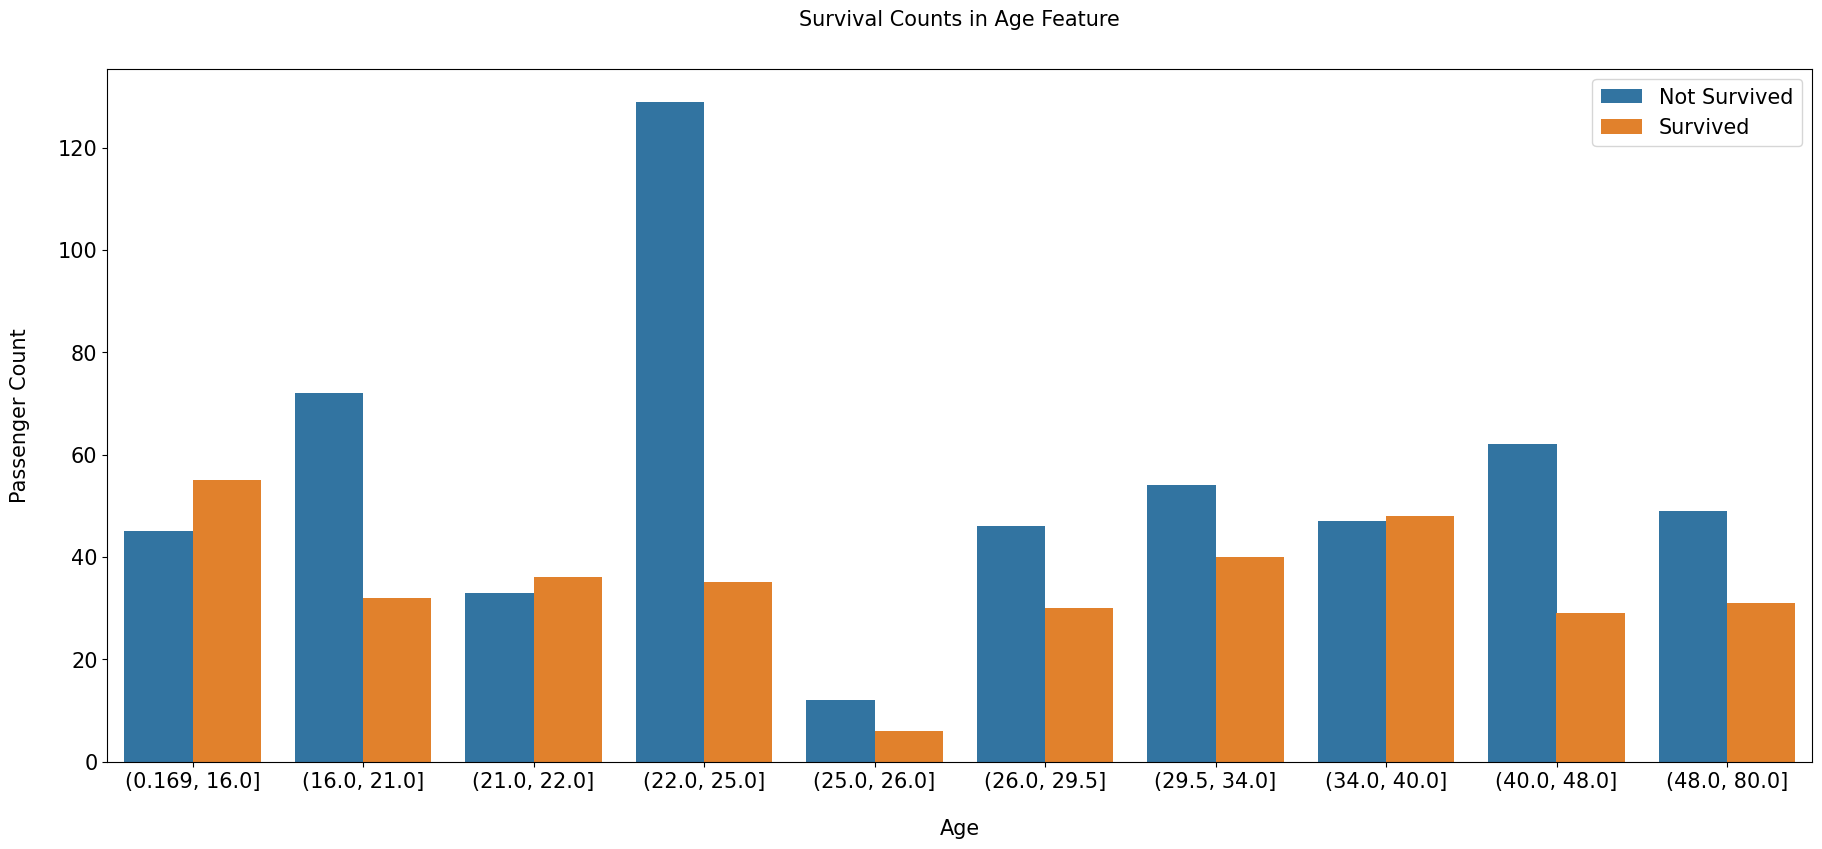

In [146]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

“年龄”特征具有正态分布，有一些尖峰和凸起，**10**分位数的箱用于“年龄”。第一个箱的存活率最高，第四个箱的存活率最低。这些是分布中最大的峰值。在这个过程中，还有一个不寻常的组（34.0，40.0]，存活率很高。

### 频率编码

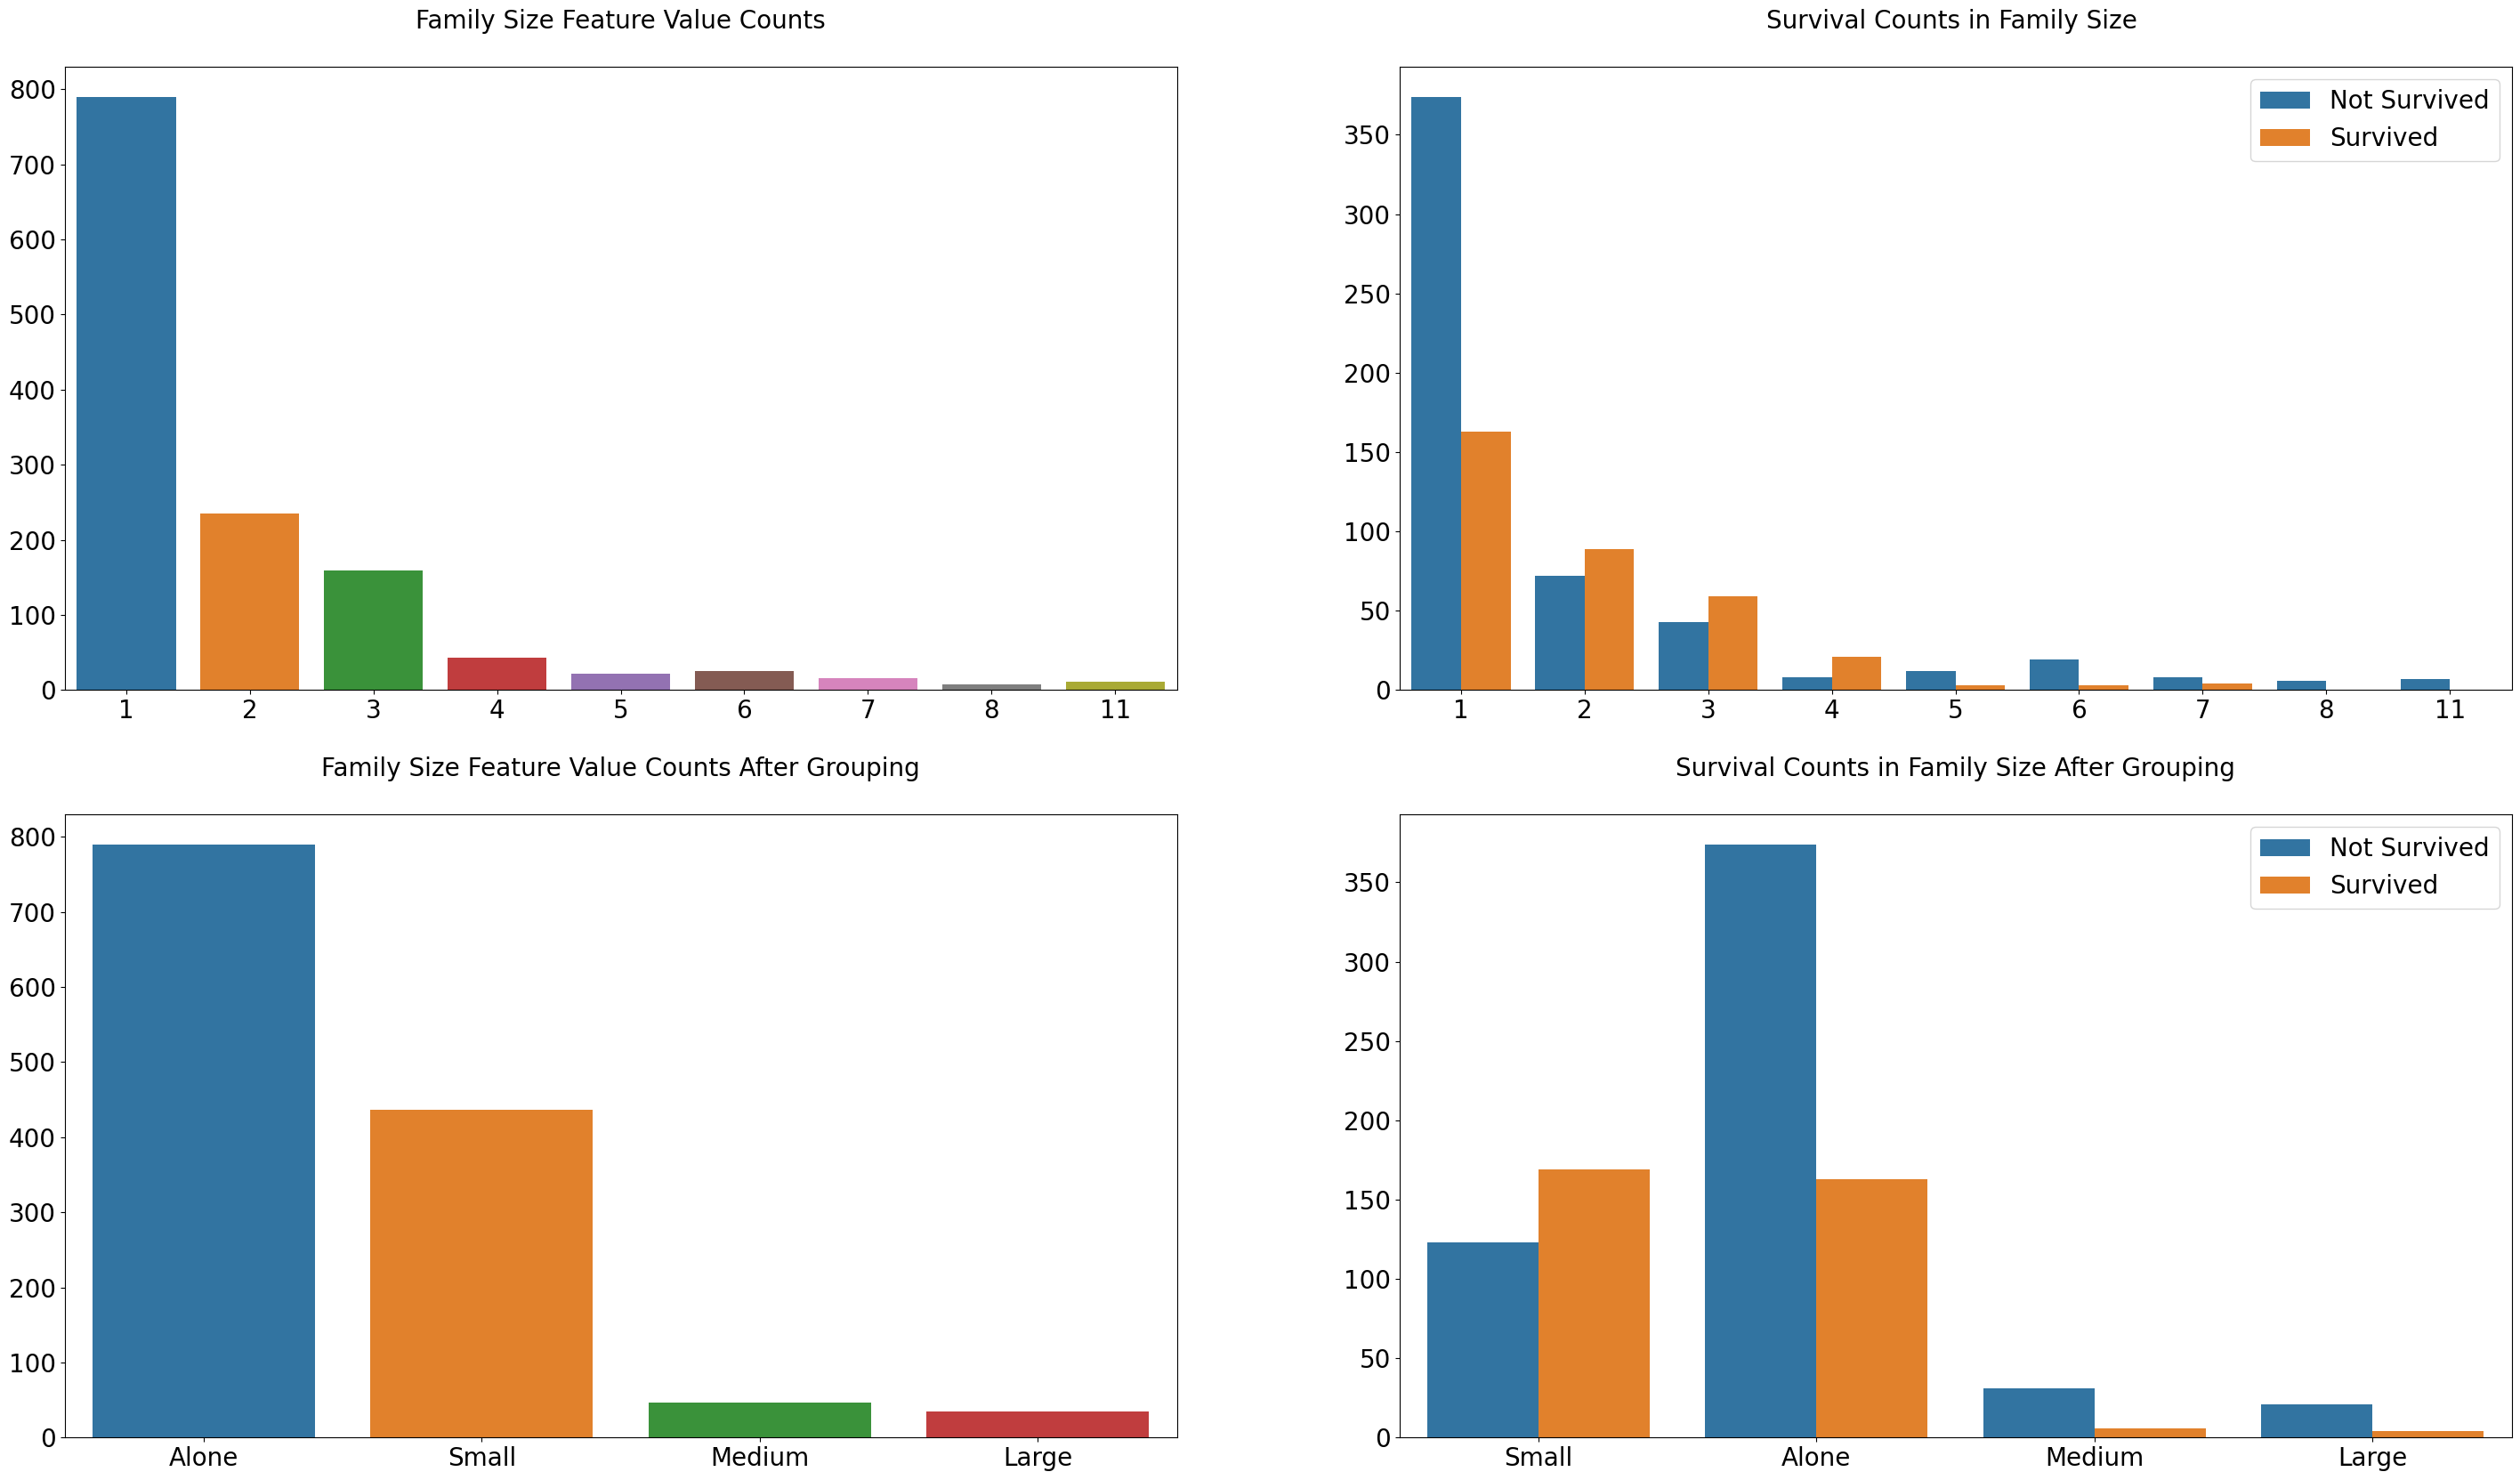

In [147]:
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all['Family_Size'].value_counts().index, y=all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all['Family_Size_Grouped'] = all['Family_Size'].map(family_map)

sns.barplot(x=all['Family_Size_Grouped'].value_counts().index, y=all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

“Family_Size”是通过添加“SibSp”、“Parch”和**1**来创建的。“SibSp”是兄弟姐妹和配偶的计数，“Parch”是父母和孩子的计数。添加这些列是为了查找族的总大小。在末尾添加 **1**，是当前乘客。图表清楚地表明，家庭规模是生存的预测指标，因为不同的值具有不同的存活率。
* 带 **1** 的家庭大小标记为**Alone**
* 包含 **2**、**3** 和 **4** 的家庭大小标记为**Small**
* 包含 **5** 和 **6** 的家庭大小标记为**Medium**
* 包含 **7**、**8** 和 **11** 的家庭大小标记为**Large**

有太多独特的`Ticket`值需要分析，因此将它们按频率分组会使事情变得更容易。

**此特征与 `Family_Size` 有何不同？** 许多乘客结伴旅行。那些团体包括朋友、保姆、女佣等等。他们不算是一家人，但他们使用的是同一张票。

**为什么不按前缀对票进行分组？**如果`Ticket`特征中的前缀有任何意义，那么它们已经在“Pclass”或“Embarked”特征中被捕获，因为这可能是唯一可以从中导出的逻辑信息`Ticket` 功能。

根据下图，有 **2**、**3** 和 **4** 成员的组的存活率更高。独自旅行的乘客存活率最低。 **4**之后，存活率急剧下降。此模式与“Family_Size”功能非常相似，但存在细微差别。 `Ticket_Frequency` 值不像 `Family_Size` 那样分组，因为这基本上会创建具有完美相关性的相同特征。这种功能不会提供任何额外的信息增益。


In [148]:
all['Ticket_Frequency'] = all.groupby('Ticket')['Ticket'].transform('count')

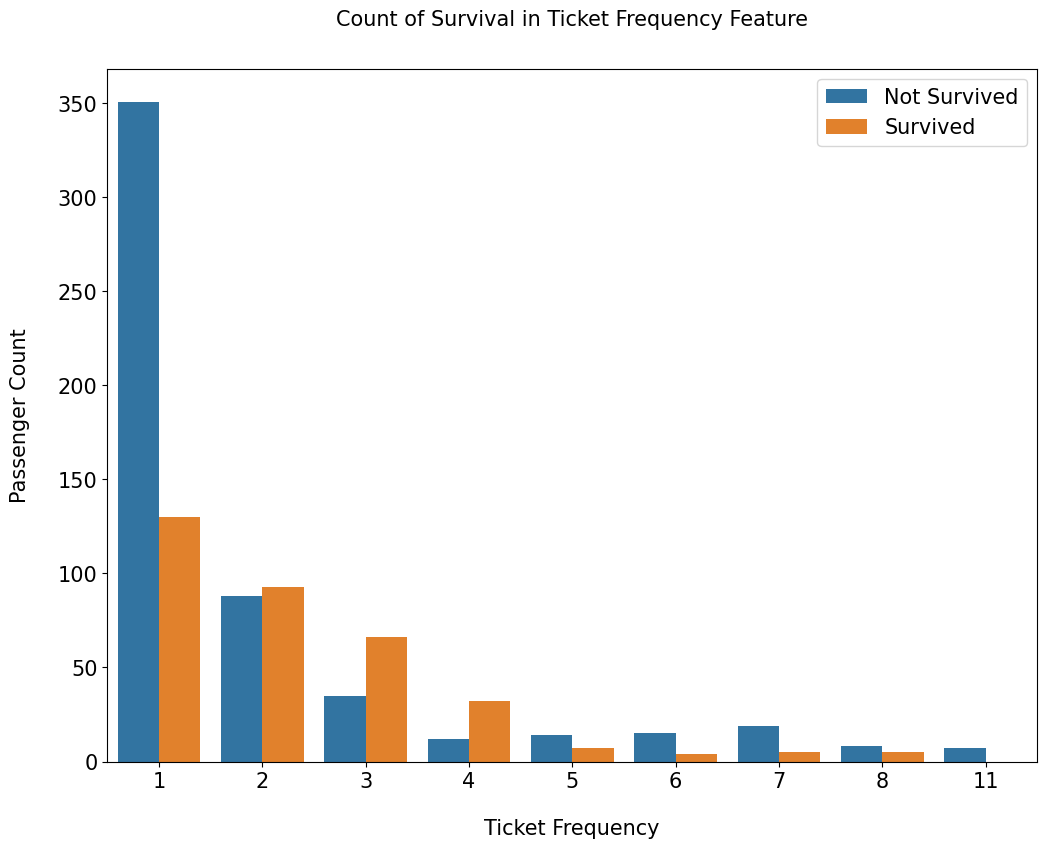

In [149]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

### Title & Is Married

`Title` 是通过提取 `Name` 特征之前的前缀来创建的。 根据下图，有很多标题出现的次数很少。 其中一些标题似乎不正确，需要更换。 **Miss**, **Mrs**, **Ms**, **Mlle**, **Lady**, **Mme**, **the Countess**, **Dona**的头衔是 替换为 **Miss/Mrs/Ms** 因为他们都是女性。 **Mlle**、**Mme** 和 **Dona** 等值实际上是乘客的姓名，但它们被归类为标题，因为 `Name` 特征被逗号分隔。 **Dr**, **Col**, **Major**, **Jonkheer**, **Capt**, **Sir**, **Don** 和 **Rev** 头衔被替换 与**Dr/Military/Noble/Clergy**，因为这些乘客具有相似的特征。 **Master**是一个独特的称号，它提供给 **26** 岁以下的男性乘客。 他们在所有男性中的存活率最高。

`Is_Married` 是基于 **Mrs** 头衔的二元特征。 **Mrs**头衔是所有女性头衔中存活率最高的。 这个标题需要成为一个特征，因为所有女性title都相互组合在一起。

In [150]:
all['Title'] = all['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
all['Is Married'] = 0
all['Is Married'].loc[all['Title'] == 'Mrs'] = 1

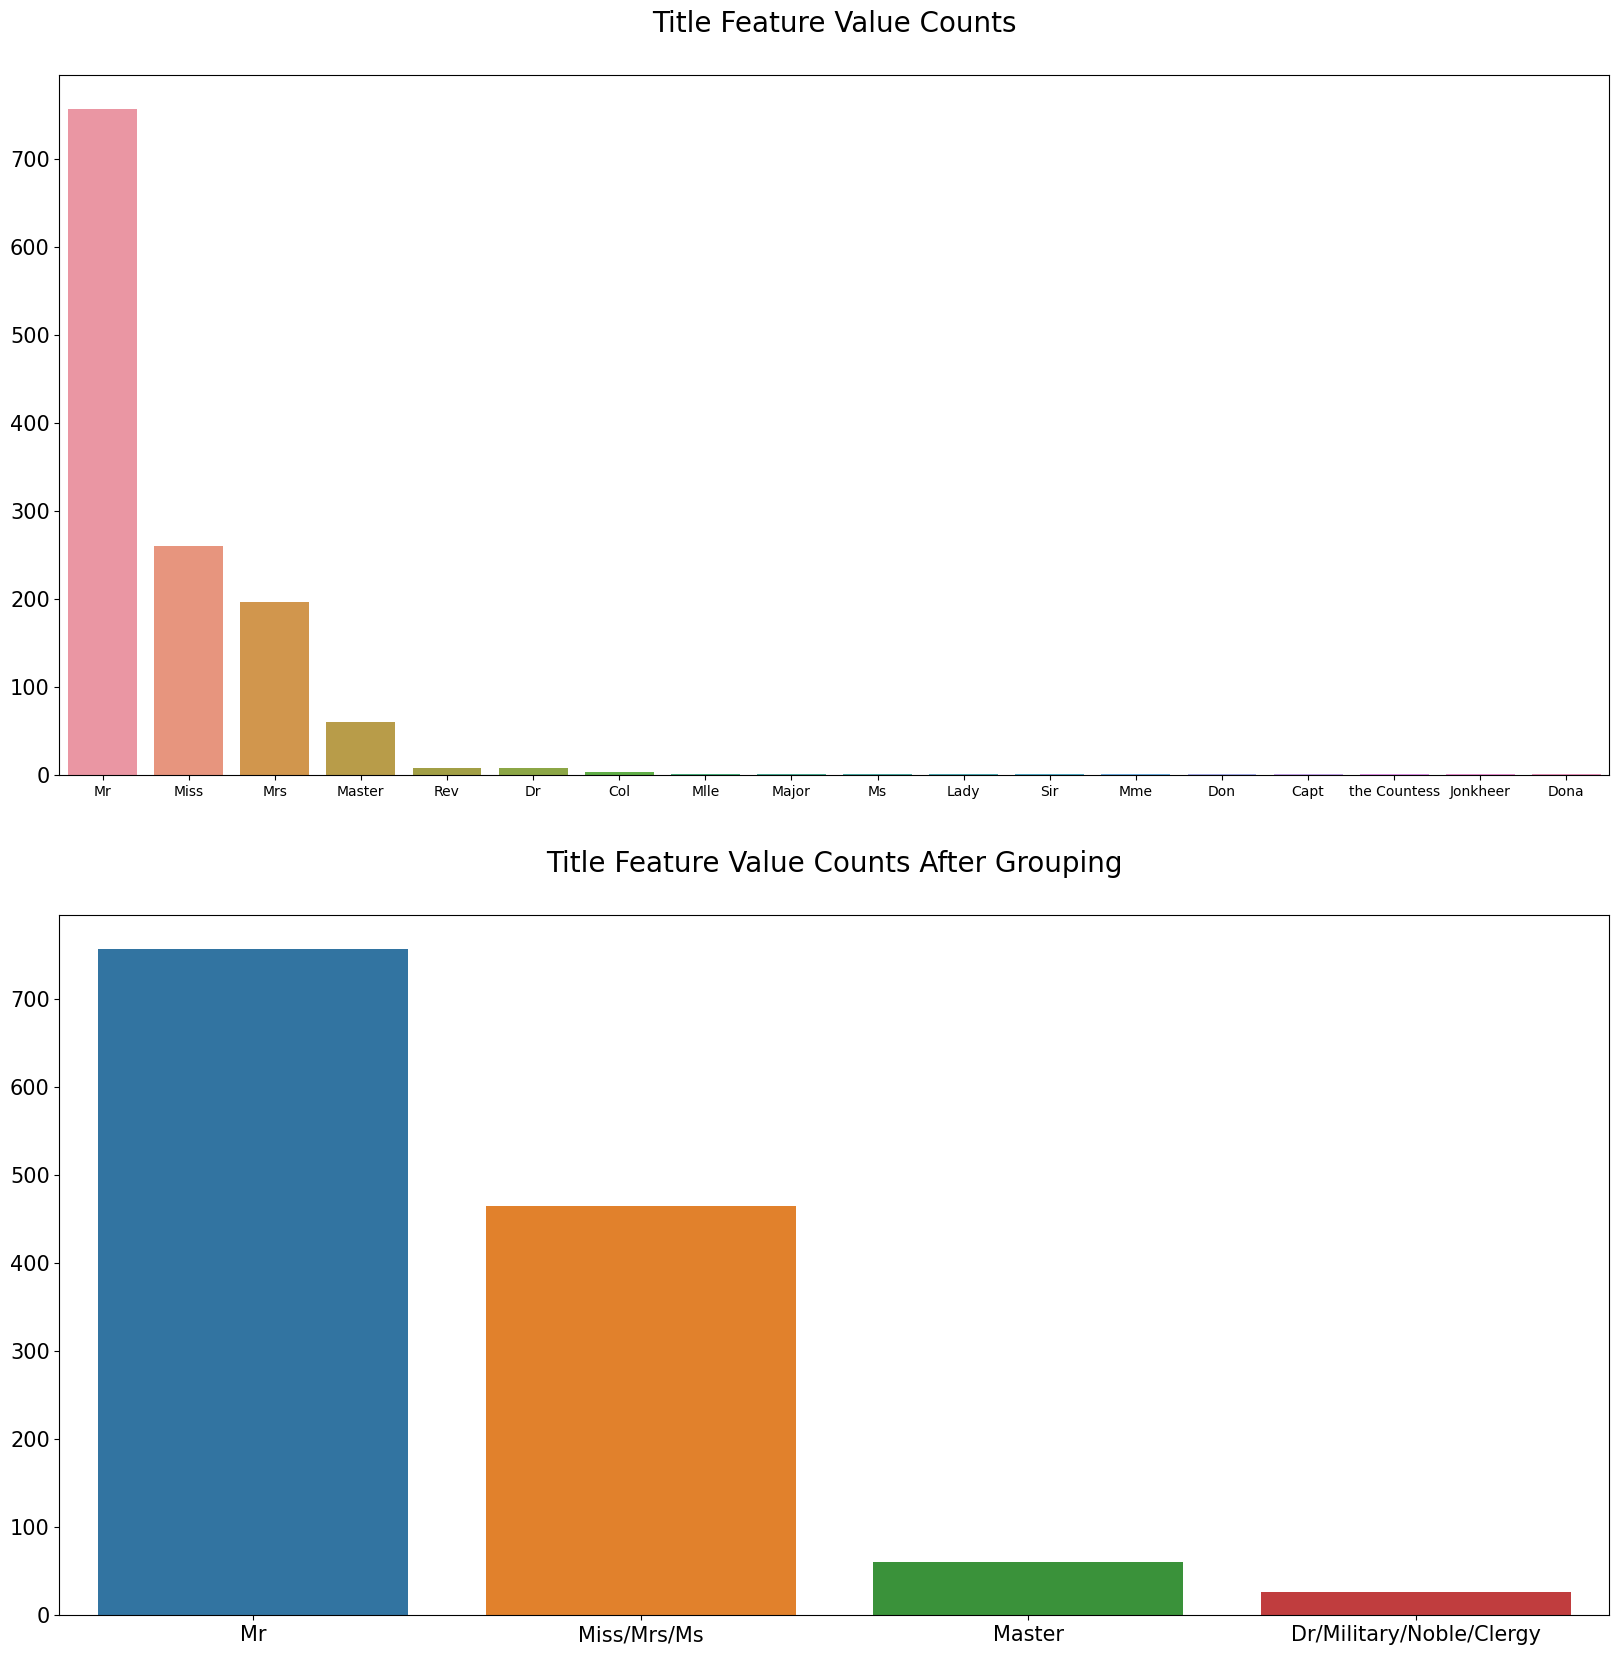

In [151]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=all['Title'].value_counts().index, y=all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

# 替换
all['Title'] = all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all['Title'] = all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all['Title'].value_counts().index, y=all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

### 目标编码

`extract_surname` 函数用于从 `Name` 特征中提取乘客的姓氏。 使用提取的姓氏创建`Family`特征。 这对于将乘客分组在同一家庭中是必要的。

In [152]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

all['Family'] = extract_surname(all['Name'])
train = all.loc[:890]
test = all.loc[891:]
dfs = [train, test]

`Family_Survival_Rate` 是根据训练集中的家庭计算的，因为测试集中没有`Survived` 特征。 创建训练集和测试集中出现的姓氏列表（`non_unique_families`）。 计算该列表中超过 1 个成员的家庭的存活率，并存储在`Family_Survival_Rate`特征中。

为测试集独有的家庭创建了一个额外的二进制特征`Family_Survival_Rate_NA`。 此功能也是必需的，因为无法计算这些家庭的存活率。 此特征意味着家庭生存率不适用于这些乘客，因为无法检索他们的生存率。

`Ticket_Survival_Rate` 和 `Ticket_Survival_Rate_NA` 特征也是用同样的方法创建的。 `Ticket_Survival_Rate` 和 `Family_Survival_Rate` 被平均成为 `Survival_Rate`，`Ticket_Survival_Rate_NA` 和 `Family_Survival_Rate_NA` 也被平均成为 `Survival_Rate_NA`。

In [153]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in train['Family'].unique() if x in test['Family'].unique()]
non_unique_tickets = [x for x in train['Ticket'].unique() if x in test['Ticket'].unique()]

df_family_survival_rate = train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [154]:
mean_survival_rate = np.mean(train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(train)):
    if train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train['Family_Survival_Rate'] = train_family_survival_rate
train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test['Family_Survival_Rate'] = test_family_survival_rate
test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [156]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train)):
    if train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test)):
    if test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train['Ticket_Survival_Rate'] = train_ticket_survival_rate
train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test['Ticket_Survival_Rate'] = test_ticket_survival_rate
test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [157]:
for df in [train, test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

### 特征转换

#### Label Encoding编码非数值特征
`Embarked`、`Sex`、`Deck`、`Title` 和 `Family_Size_Grouped` 是对象类型，`Age` 和 `Fare` 特征是类别类型。 它们使用 `LabelEncoder` 转换为数字类型。 `LabelEncoder` 基本上标记了从 **0** 到 **n** 的类。 这个过程对于模型从这些特征中学习是必要的。

In [158]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

#### One-Hot Encoding编码分类特征

分类特征（`Pclass`、`Sex`、`Deck`、`Embarked`、`Title`）使用 `OneHotEncoder` 转换为one-hot编码特征。 `Age` 和 `Fare` 特征没有被转换，因为它们与之前的特征不同，它们是有序的。

In [159]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

train = pd.concat([train, *encoded_features[:6]], axis=1)
test = pd.concat([test, *encoded_features[6:]], axis=1)

### 总结

`Age` 和 `Fare` 特征被装箱，分箱有助于处理异常值，它揭示了这些特征中的一些同质群体。

`Family_Size` 是通过添加 `Parch` 和 `SibSp` 特征和 **1** 创建的。

`Ticket_Frequency` 是通过计算 `Ticket` 值的出现次数来创建的。

`Name` 特征非常有用。 首先，“Title”和“Is_Married”特征是根据`Name`中的标题前缀创建的。 其次，`Family_Survival_Rate`和`Family_Survival_Rate_NA`特征是通过目标编码乘客的姓氏创建的。

`Ticket_Survival_Rate` 是通过对 `Ticket` 特征进行目标编码而创建的。

`Survival_Rate` 特征是通过对 `Family_Survival_Rate` 和 `Ticket_Survival_Rate` 特征进行平均而创建的。

最后，非数字类型的特征是label encoding的，分类特征是one-hot encoding的。 创建了 **5** 新特征（`Family_Size`、`Title`、`Is_Married`、`Survival_Rate` 和 `Survival_Rate_NA`）并在编码后删除了无用的特征。

In [160]:
all = concat_df(train, test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

all.drop(columns=drop_cols, inplace=True)

all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


## 模型建立

In [163]:
X_train = StandardScaler().fit_transform(train.drop(columns=drop_cols))
y_train = train['Survived'].values
X_test = StandardScaler().fit_transform(test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


### 随机森林Random Forest

创建了2个 RandomForestClassifier。 其中一个是单一模型，另一个是用于 k 折交叉验证。

`single_best_model` 在公共排行榜中的最高准确度是 **0.82775**。 但是，它在 k 折交叉验证中的表现并不好。 它是用于开始实验和超参数调整的好模型。

`leaderboard_model` 在具有 5 折交叉验证的公共排行榜中的最高精度是 **0.83732**。 该模型是为排行榜得分而创建的，并被调整为略微过拟合。 它被设计为过度拟合是因为每次折叠中“X_test”的估计概率将除以 **N**（折叠计数）。 如果此模型用作单个模型，则很难正确预测大量样本。

**我应该使用哪种模型？**
* `leaderboard_model` 过度拟合测试集，因此不建议在现实生活项目中使用这样的模型。
* `single_best_model` 是开始试验和学习决策树的好模型。

In [162]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

`StratifiedKFold` 用于对目标变量进行分层。 通过在目标变量 (`Survived`) 中保留每个类别的样本百分比来进行折叠。

In [165]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=all.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    leaderboard_model.fit(X_train[trn_idx], y_train[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concur

Fold 1 OOB Score: 0.8553370786516854

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concur

Fold 2 OOB Score: 0.844319775596073

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concur

Fold 3 OOB Score: 0.8513323983169705

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concur

Fold 4 OOB Score: 0.8359046283309958

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concur

Fold 5 OOB Score: 0.8260869565217391

Average OOB Score: 0.8425961674834928


### 特征重要性

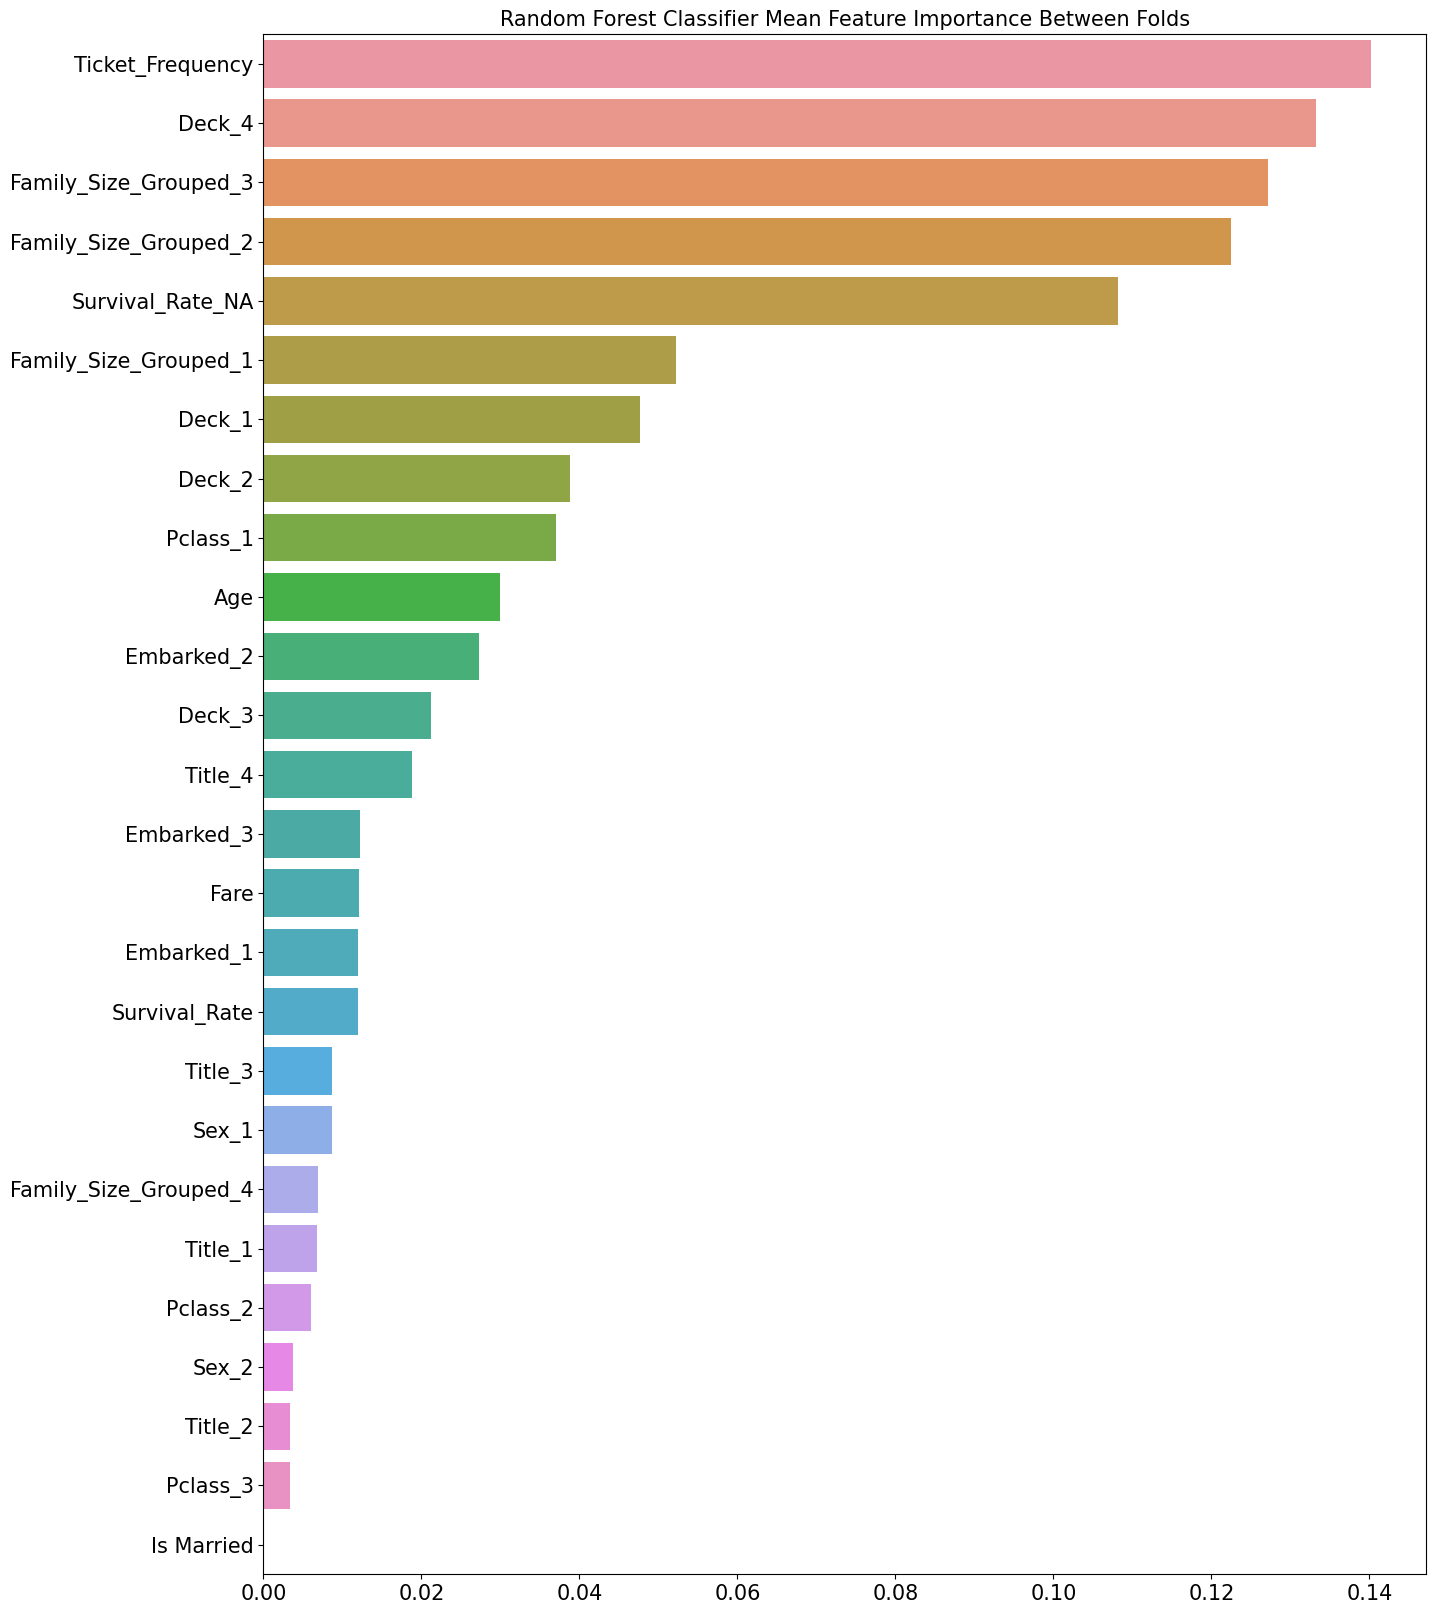

In [166]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()

### ROC曲线

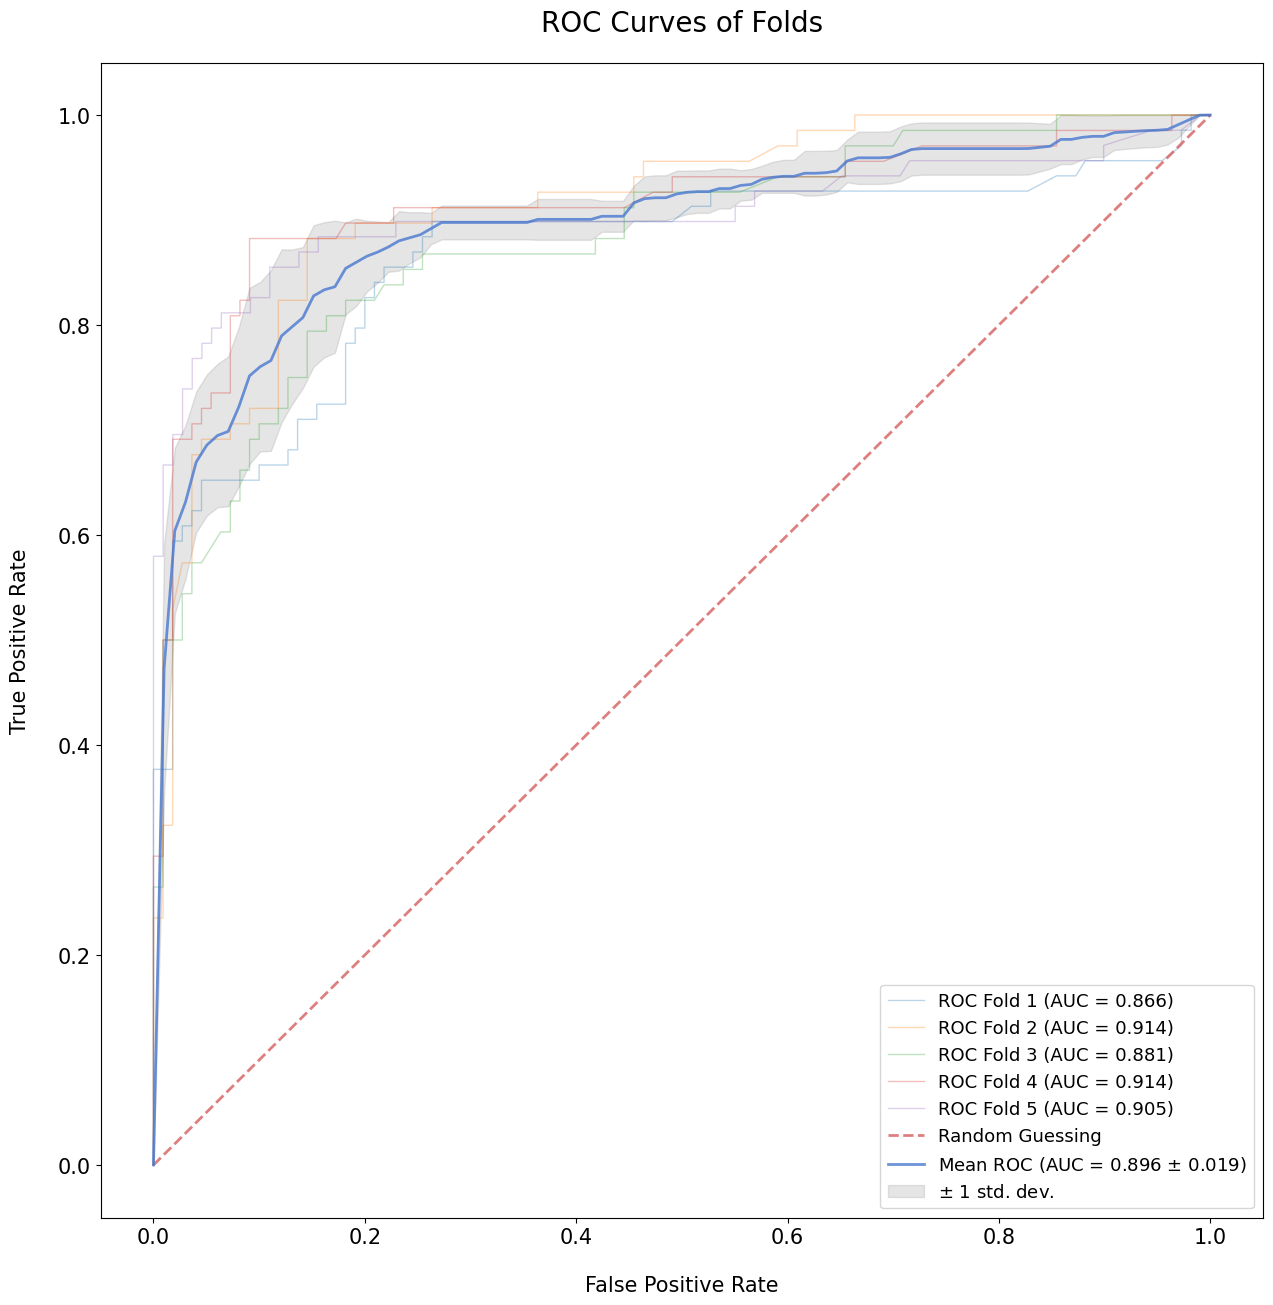

In [167]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

### 提交结果

In [169]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0
